In [1]:
%matplotlib notebook
import numpy as np
import poppy
import matplotlib.pyplot as plt
import astropy.units as u
from llowfs import generate_wfe_array, simulate_multiple_llowfs
import h5py
import scipy.io

In [82]:
#size of output images is npix_detector
# oversample pads the pupil plane before performing ffts. This gives more accurate simulations of 
# image plane interactions. oversample=2 is generally too low for this application. 
# oversample=4 works well and doesn't take too long (see notebook'Oversample Comparison')
# 'coronagraph' can be 'vortex' or 'fqpm'. See 'Test Responses' notebook for more info.

oversample = 4
wavelength=632e-9*u.m
coronagraph='fqpm'
npix_pupil = 512

npix_detector = 128
detector_fov = 0.3 #arcsec
detector_pixelscale = detector_fov/npix_detector
defocus = 3/(2*np.pi)
vortex_charge = 4

In [83]:
highest_coeff = 15
rms_phase_mode = 10e-9

M = highest_coeff-1
N = npix_detector
wfe_array = np.zeros((M,M+1))

initial_array = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(M+1):
    wfe_array[:,i] = initial_array
    
for i in range(M):
    wfe_array[i,i+1] = wfe_array[i,i+1] + rms_phase_mode
print(wfe_array[:,:3])
    

[[0.e+00 1.e-08 0.e+00]
 [0.e+00 0.e+00 1.e-08]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00]]


In [84]:
data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge)

In [85]:
print(np.max(data[:,:,0]))
print(np.max(data[:,:,1]))

0.002201476633163183
0.002424437078305942


<IPython.core.display.Javascript object>


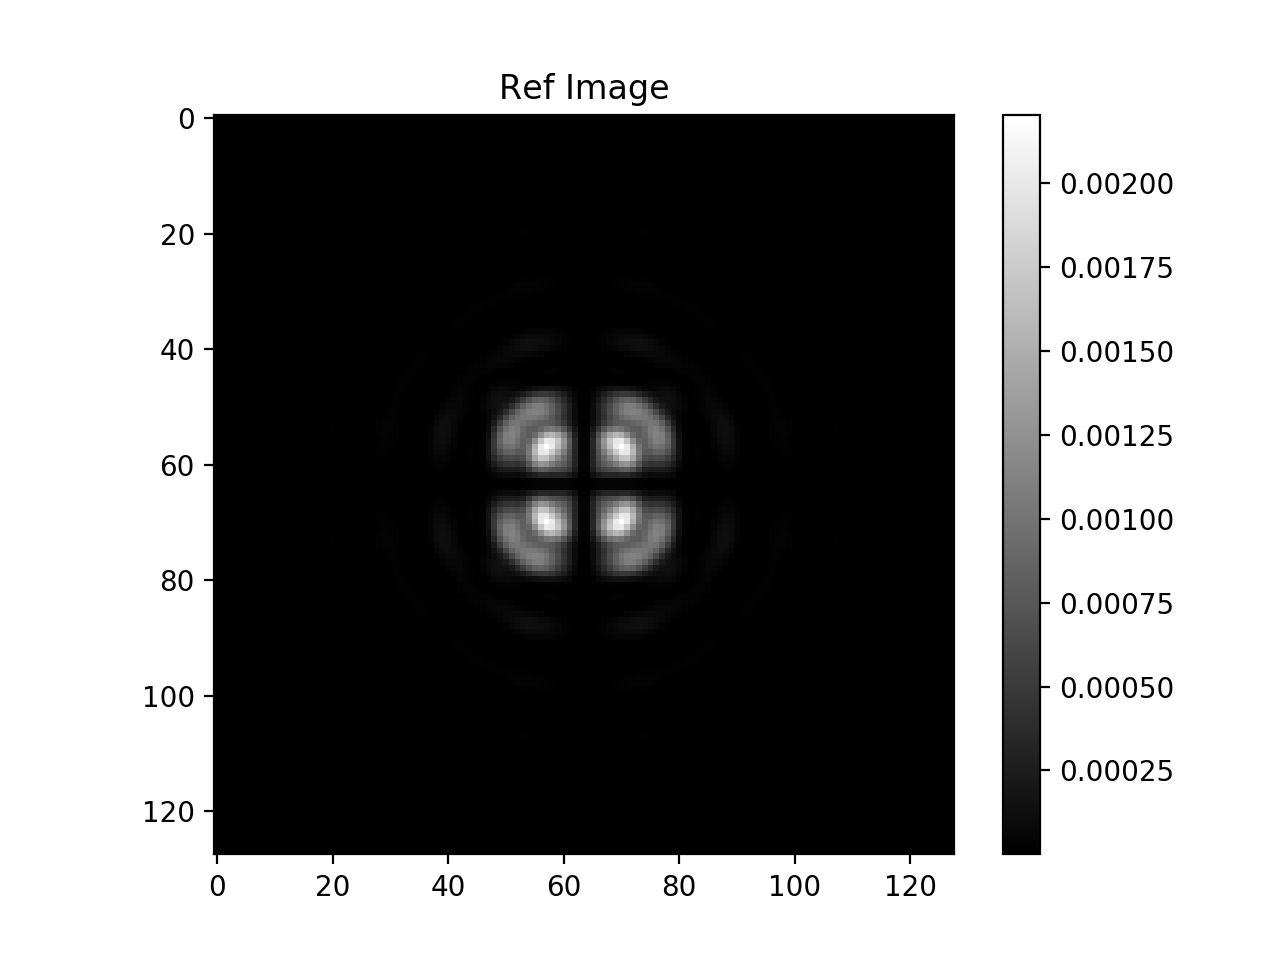

<IPython.core.display.Javascript object>


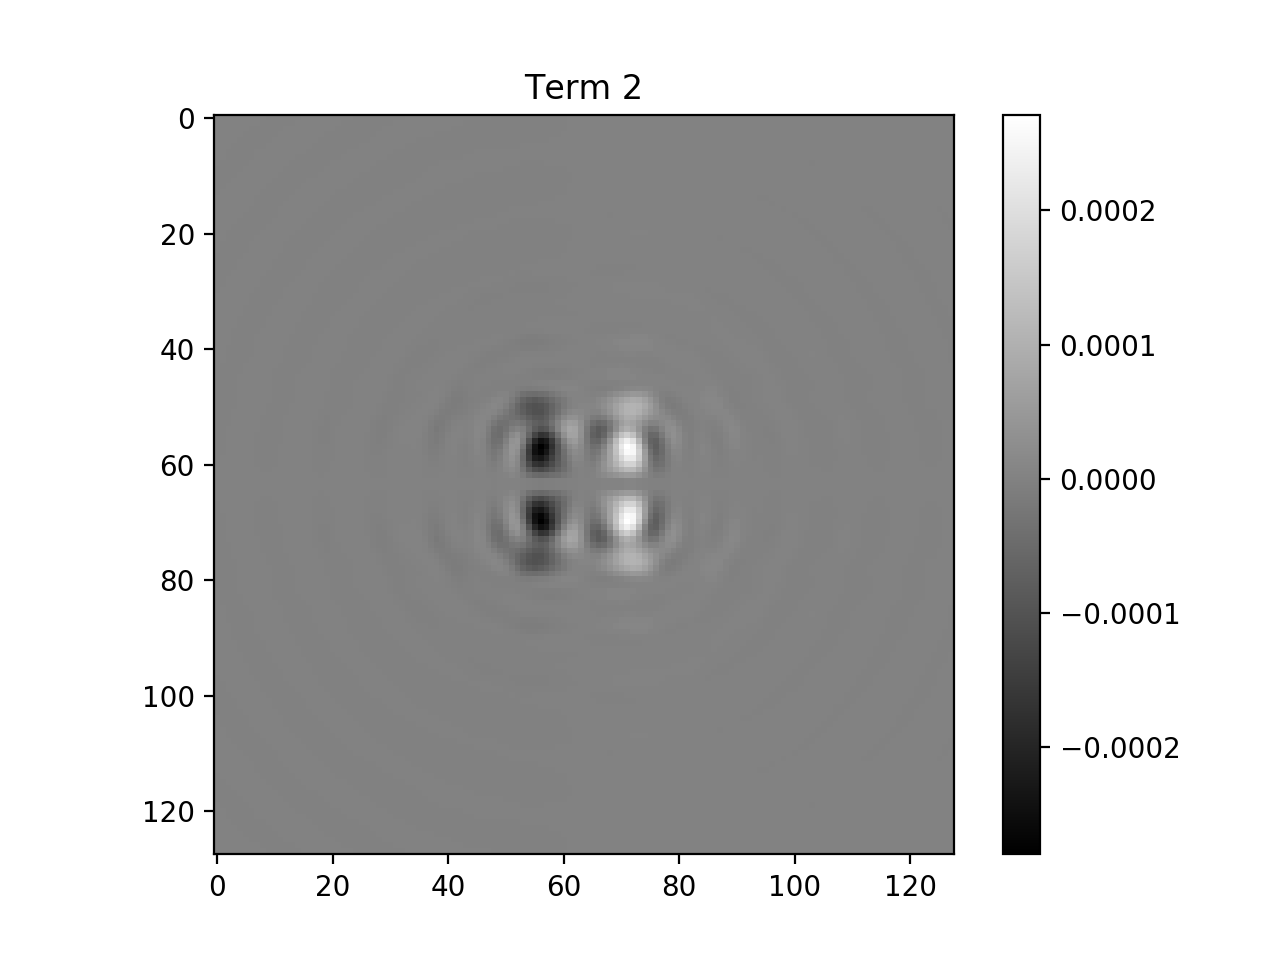

<IPython.core.display.Javascript object>


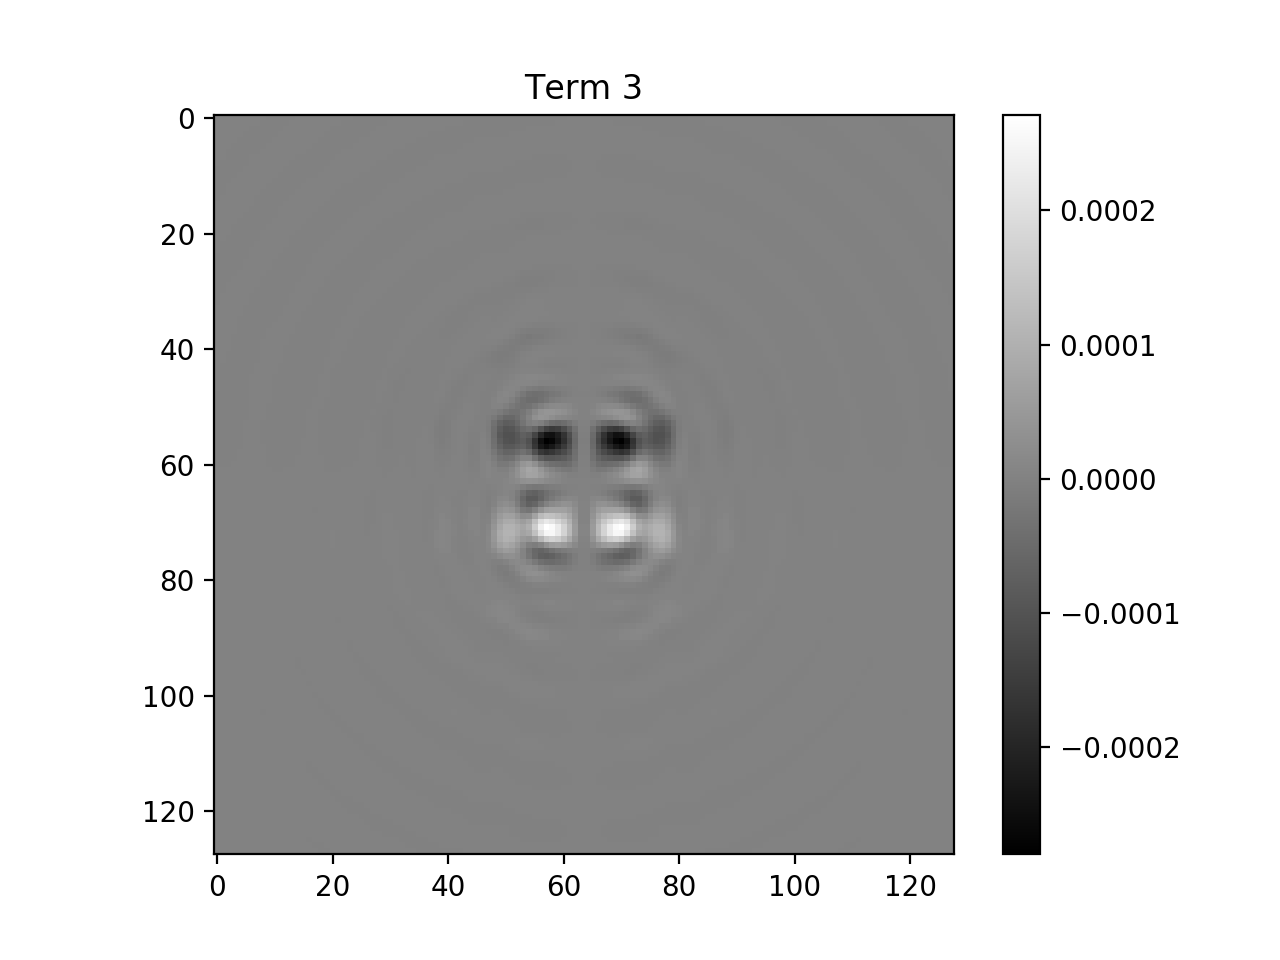

<IPython.core.display.Javascript object>


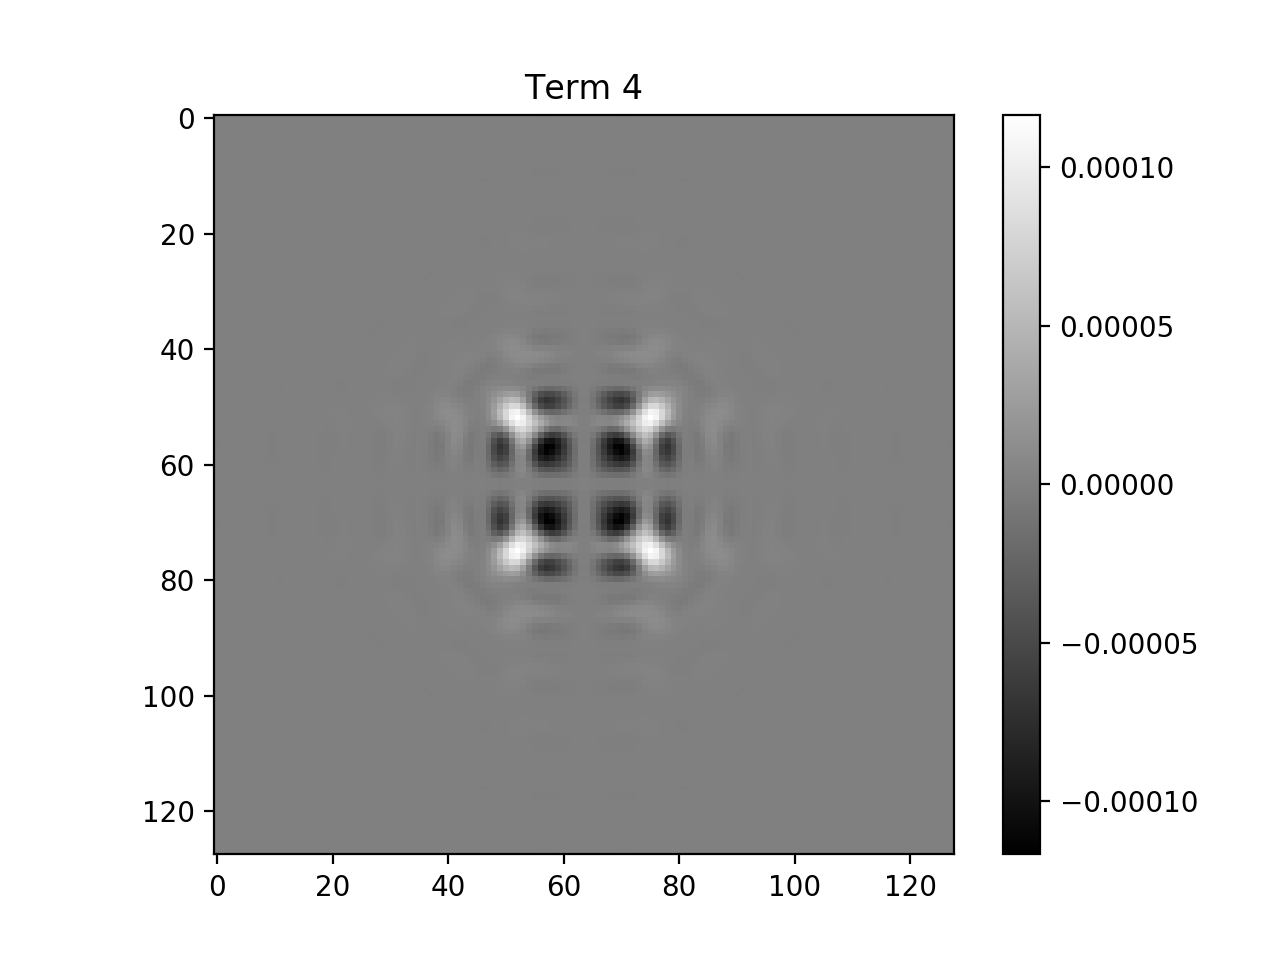

<IPython.core.display.Javascript object>


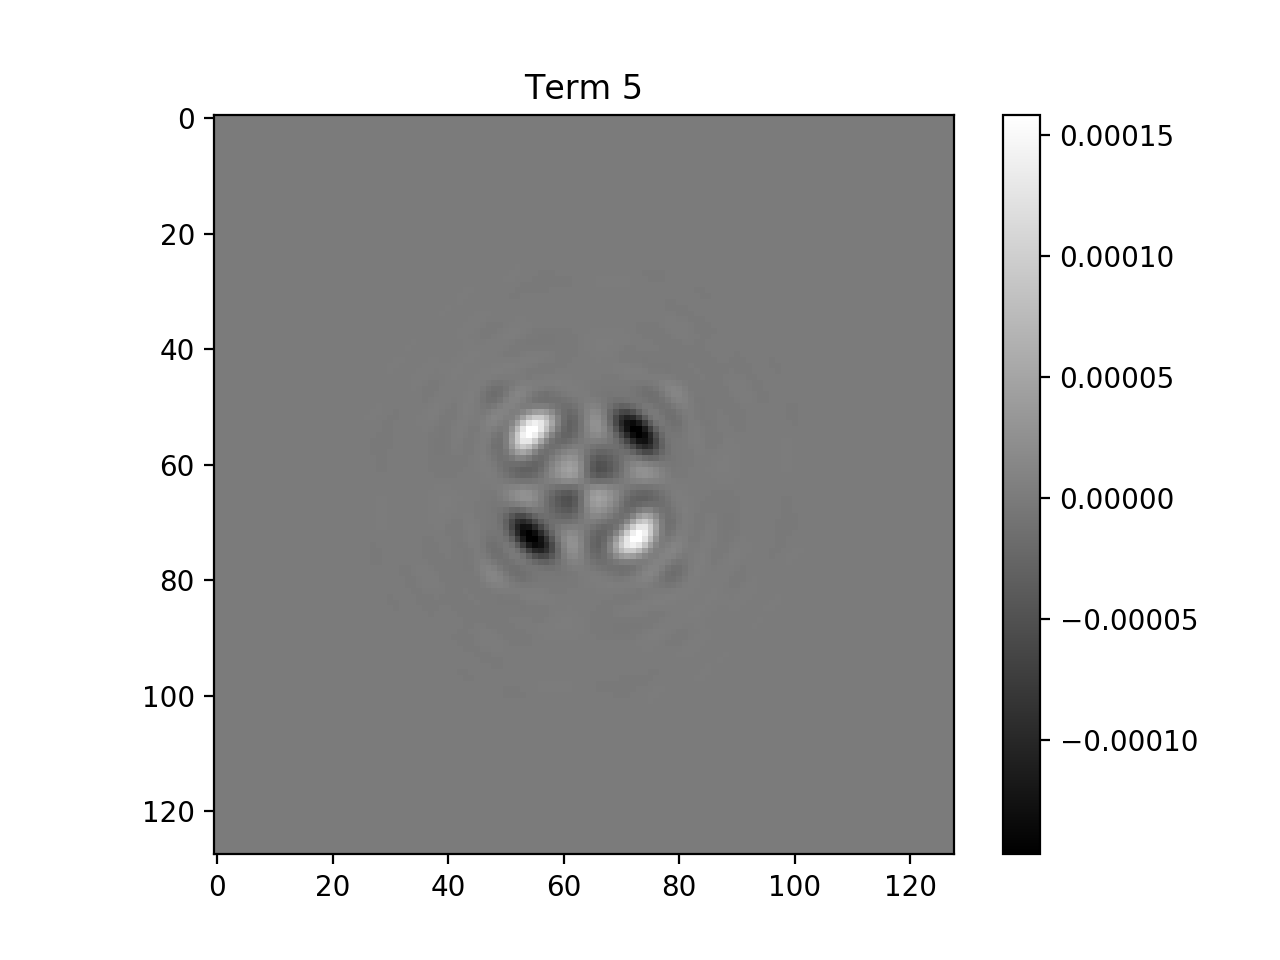

<IPython.core.display.Javascript object>


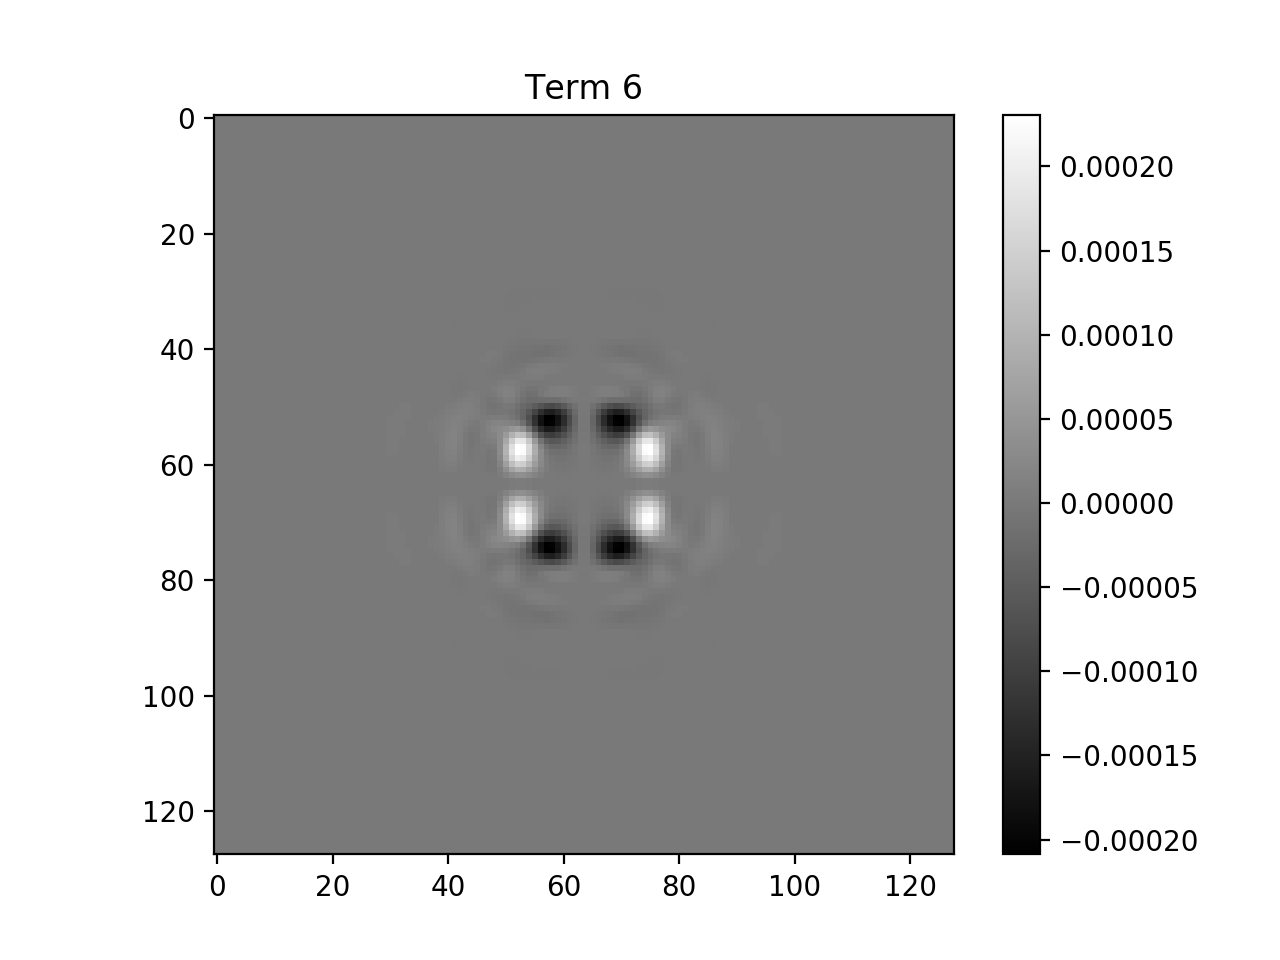

<IPython.core.display.Javascript object>


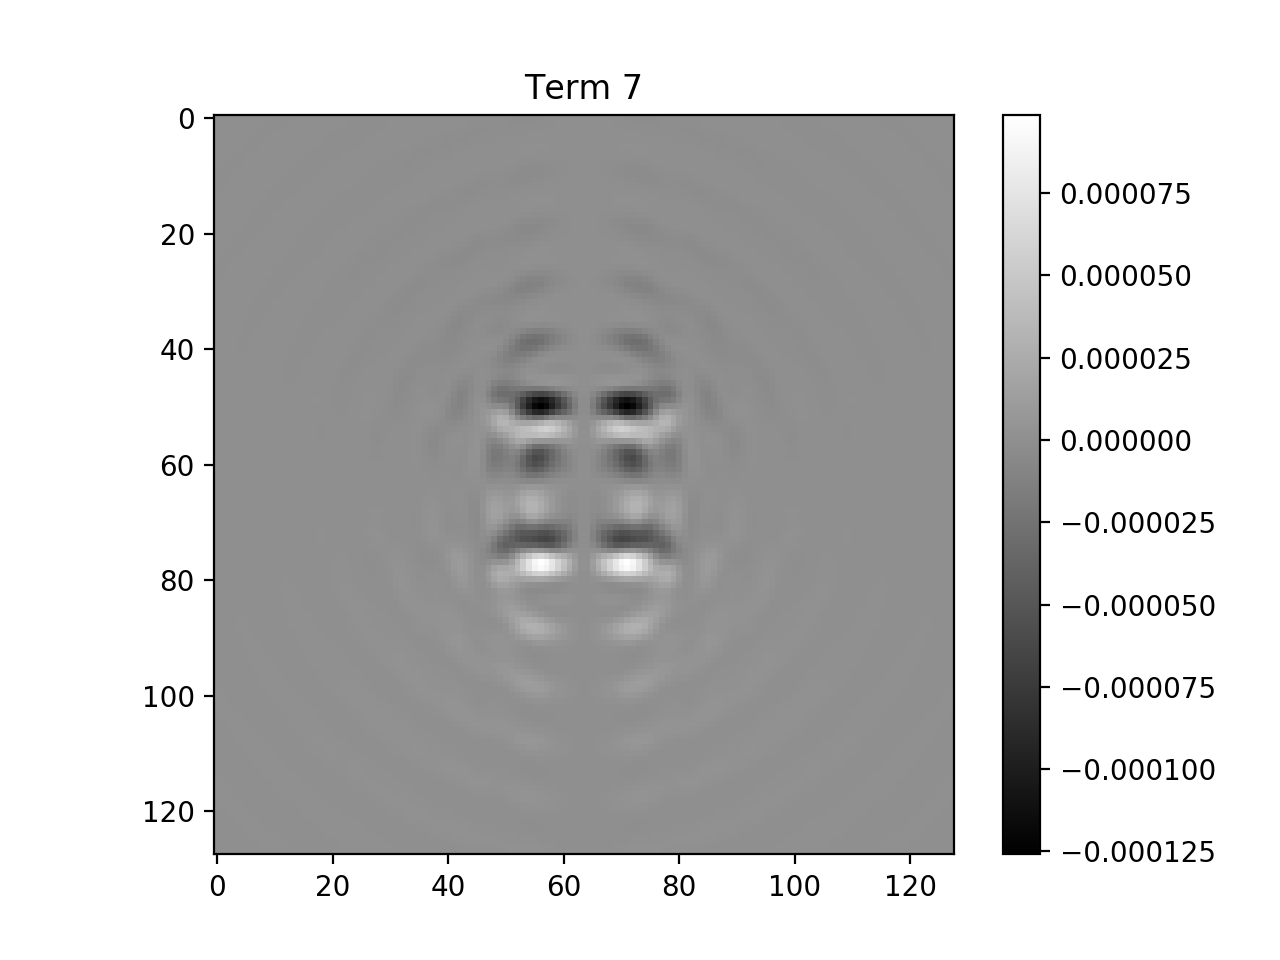

<IPython.core.display.Javascript object>


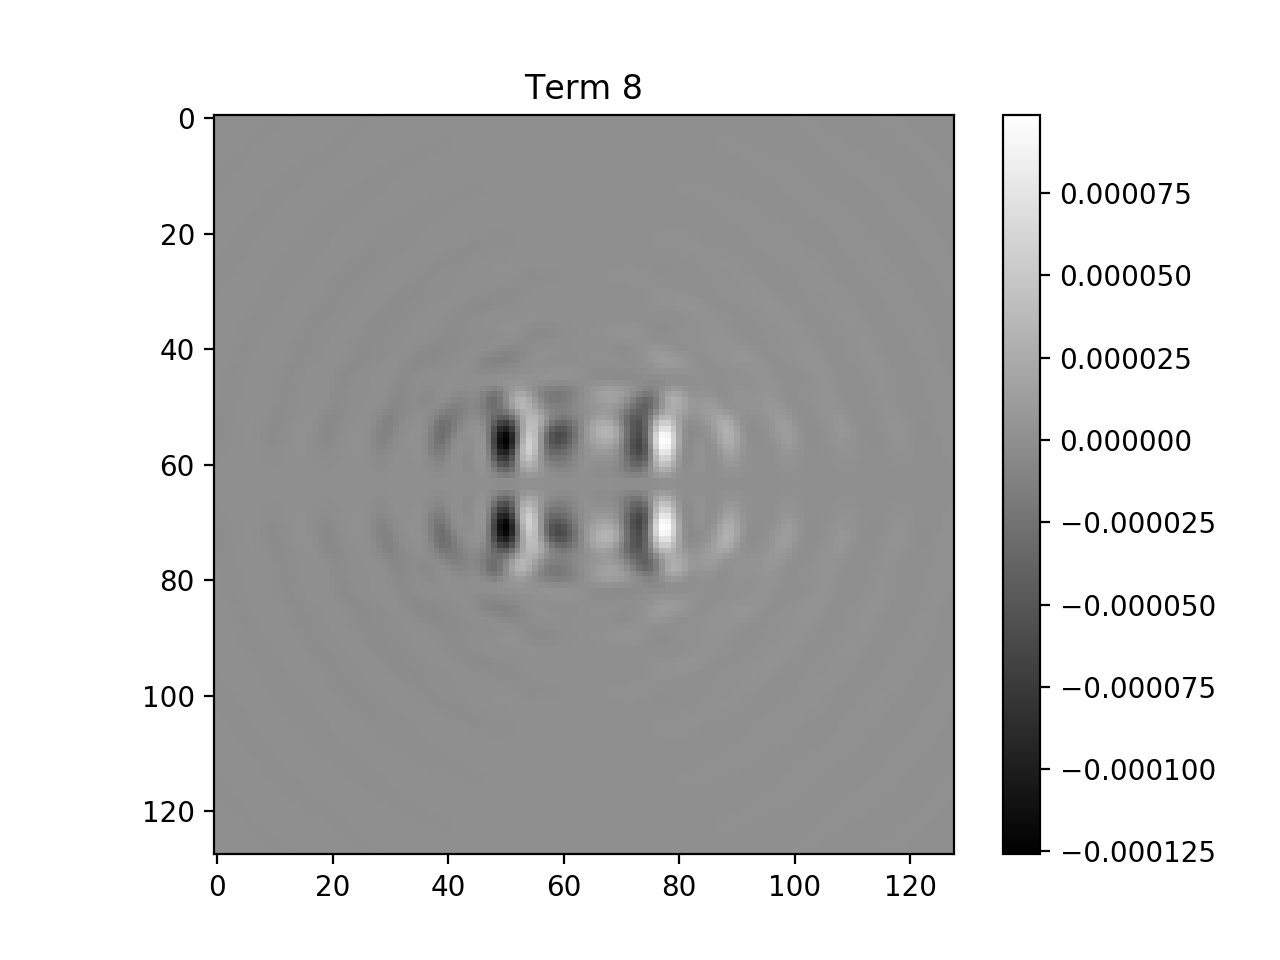

<IPython.core.display.Javascript object>


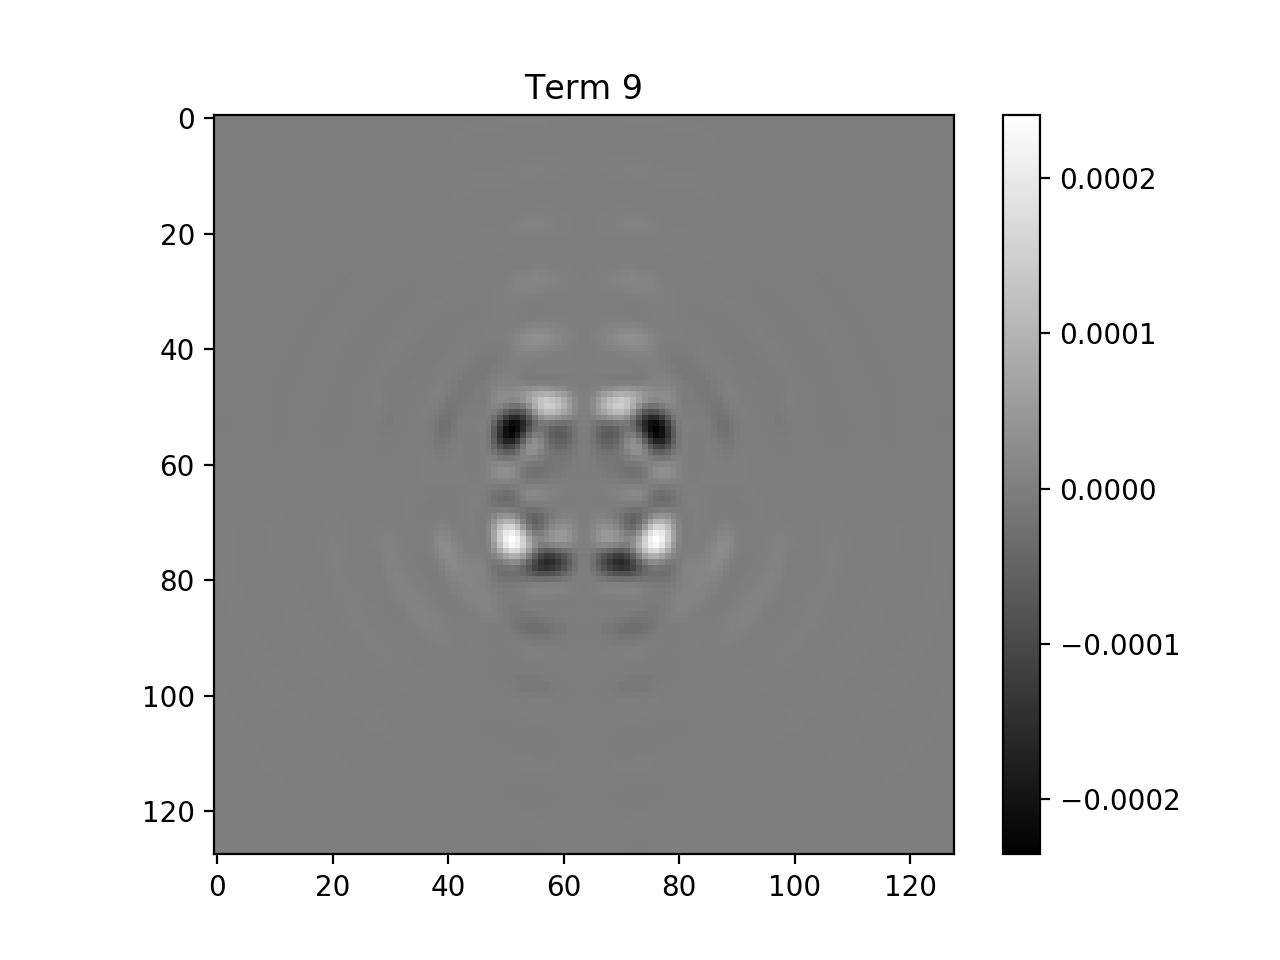

<IPython.core.display.Javascript object>


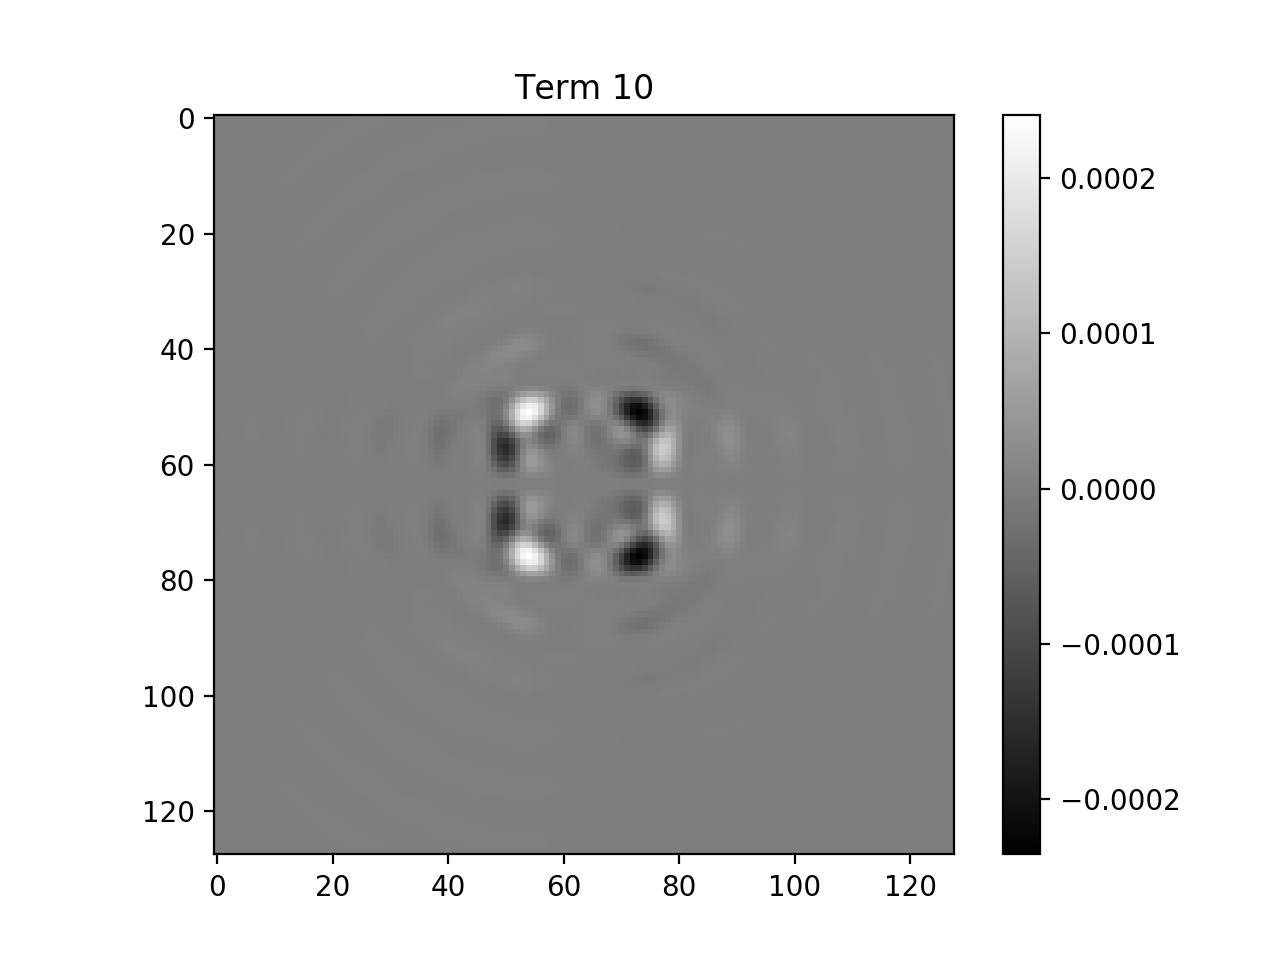

<IPython.core.display.Javascript object>


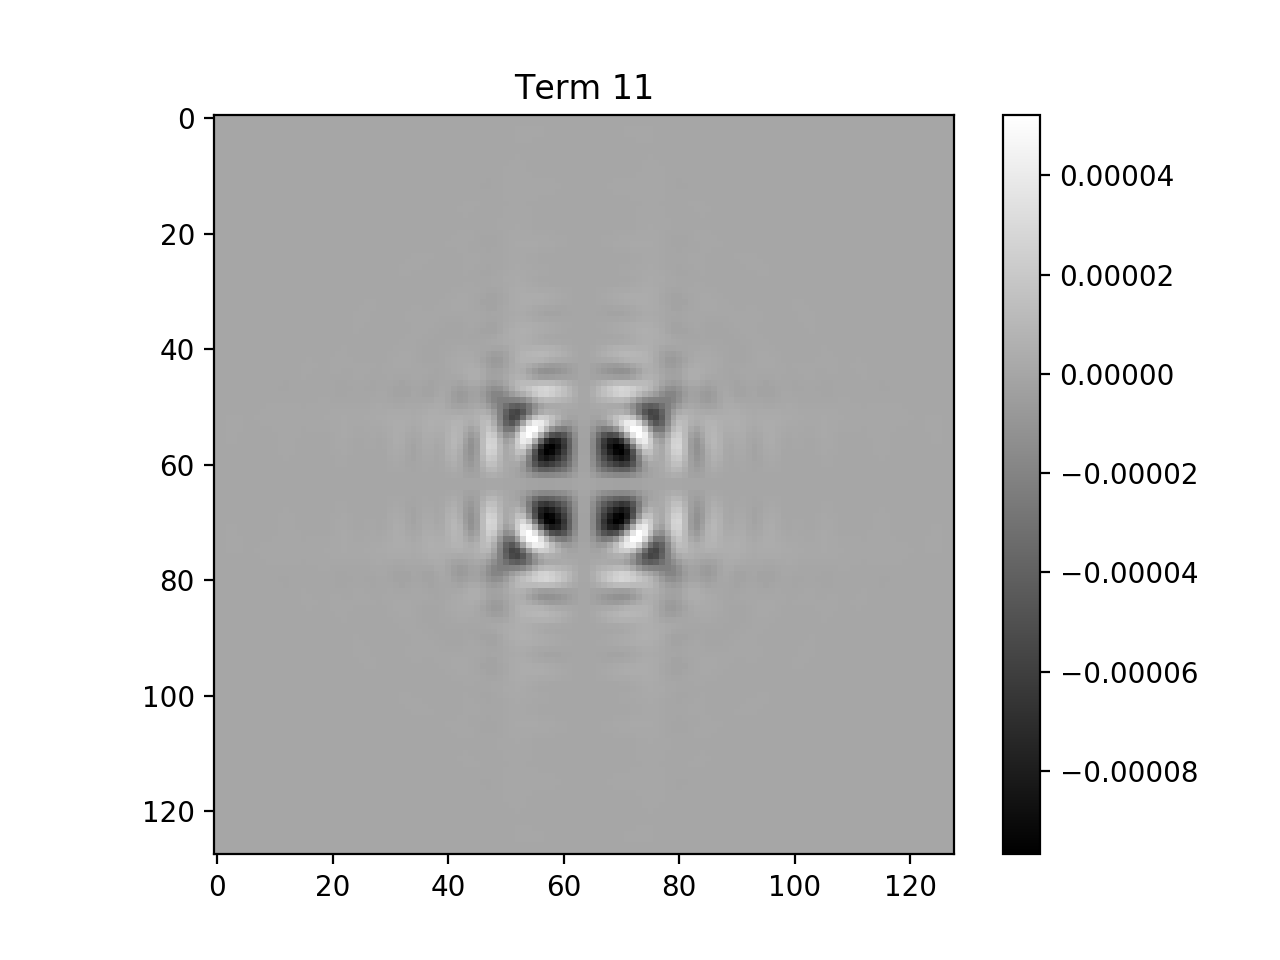

<IPython.core.display.Javascript object>


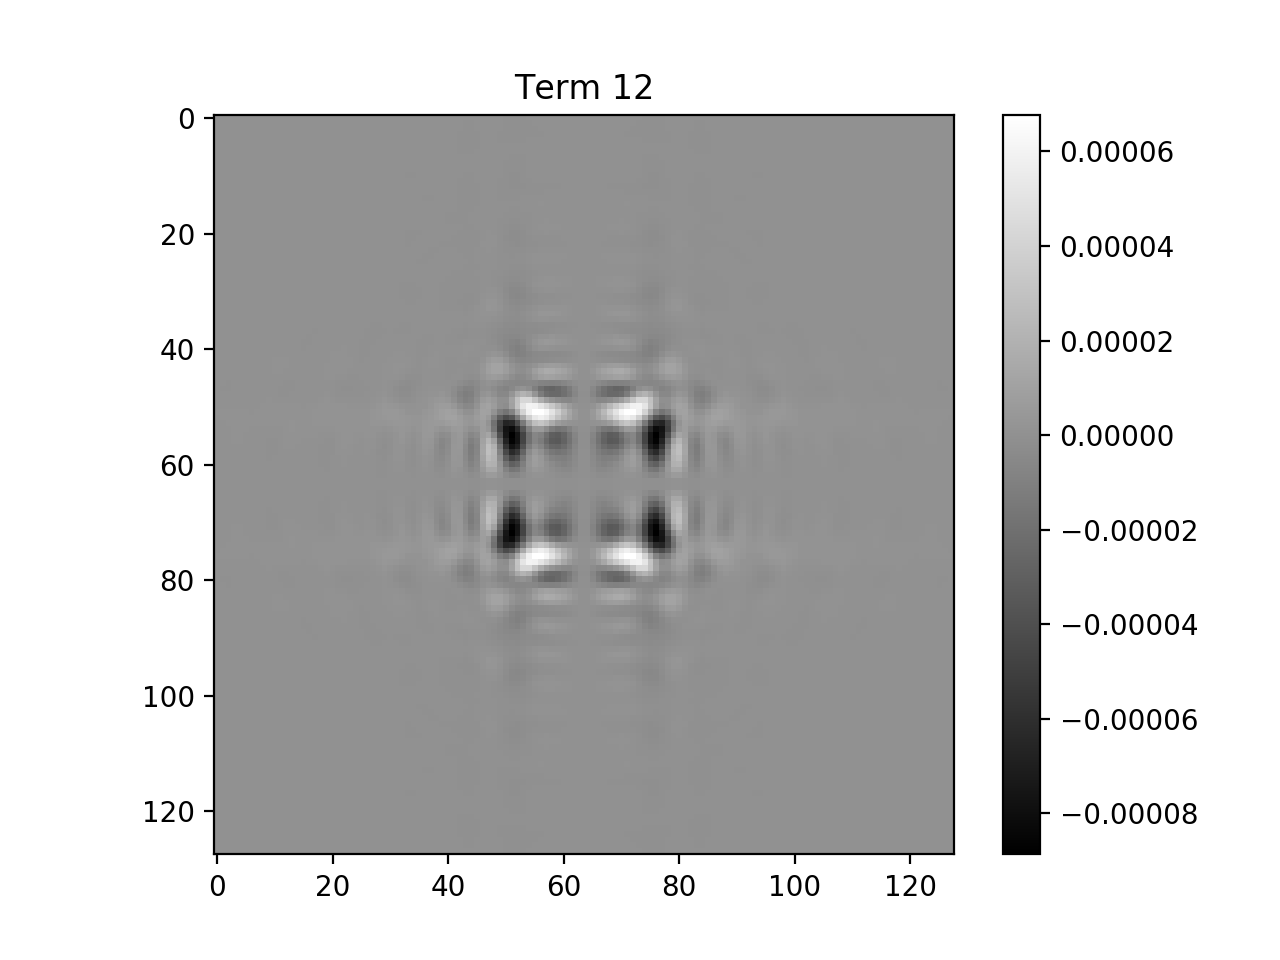

<IPython.core.display.Javascript object>


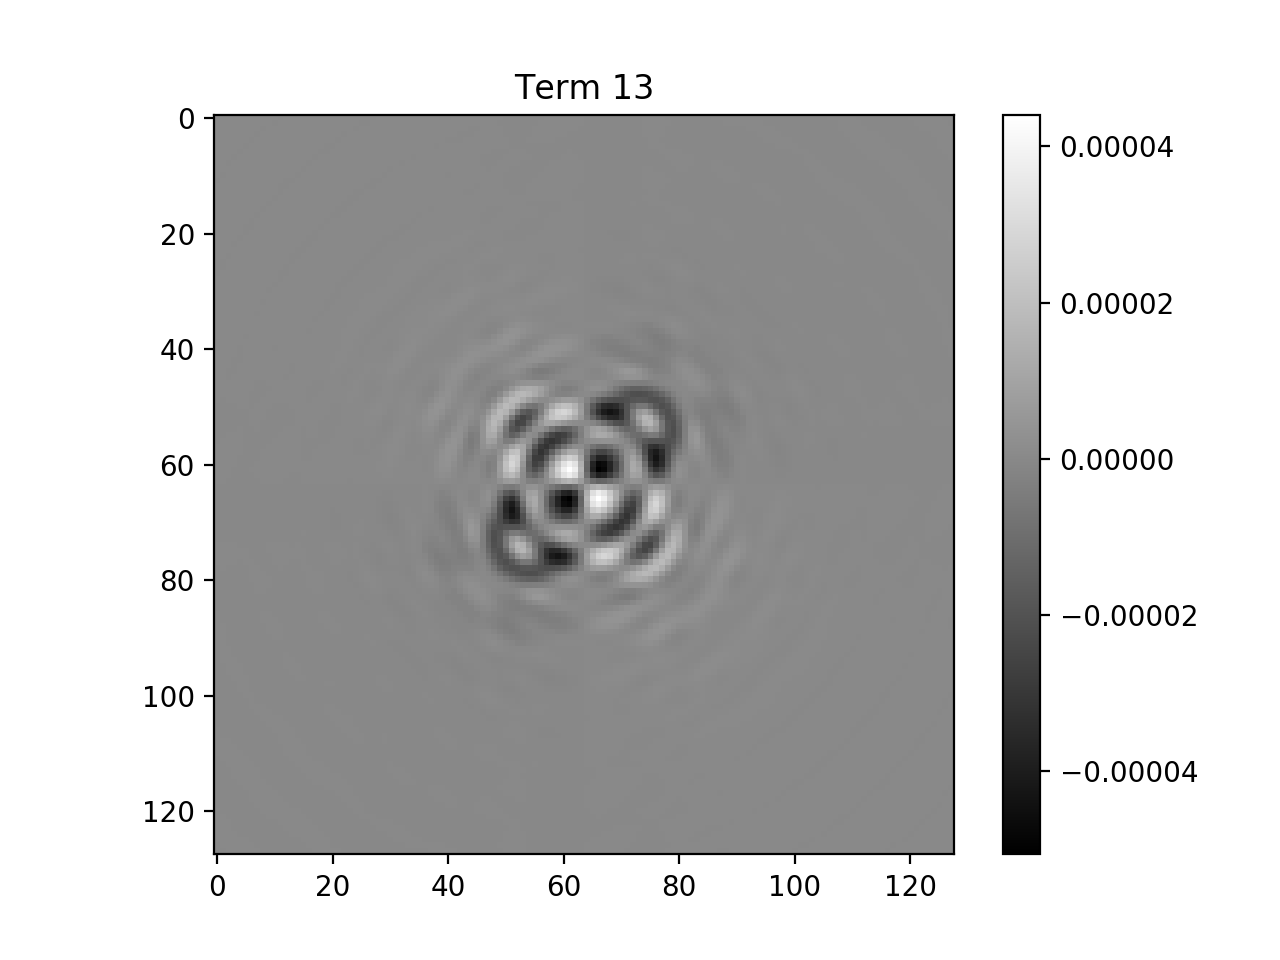

<IPython.core.display.Javascript object>


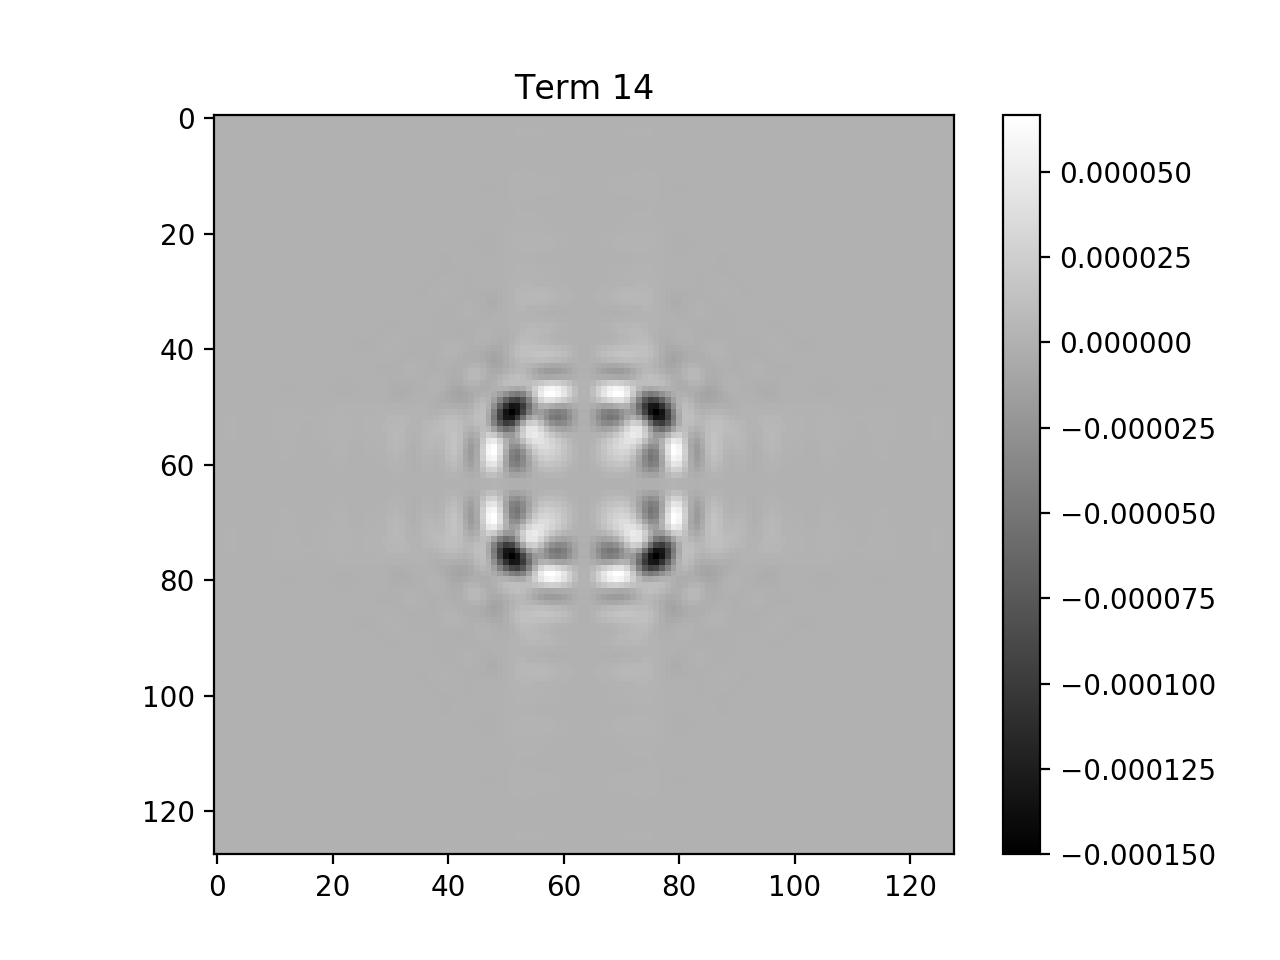

<IPython.core.display.Javascript object>


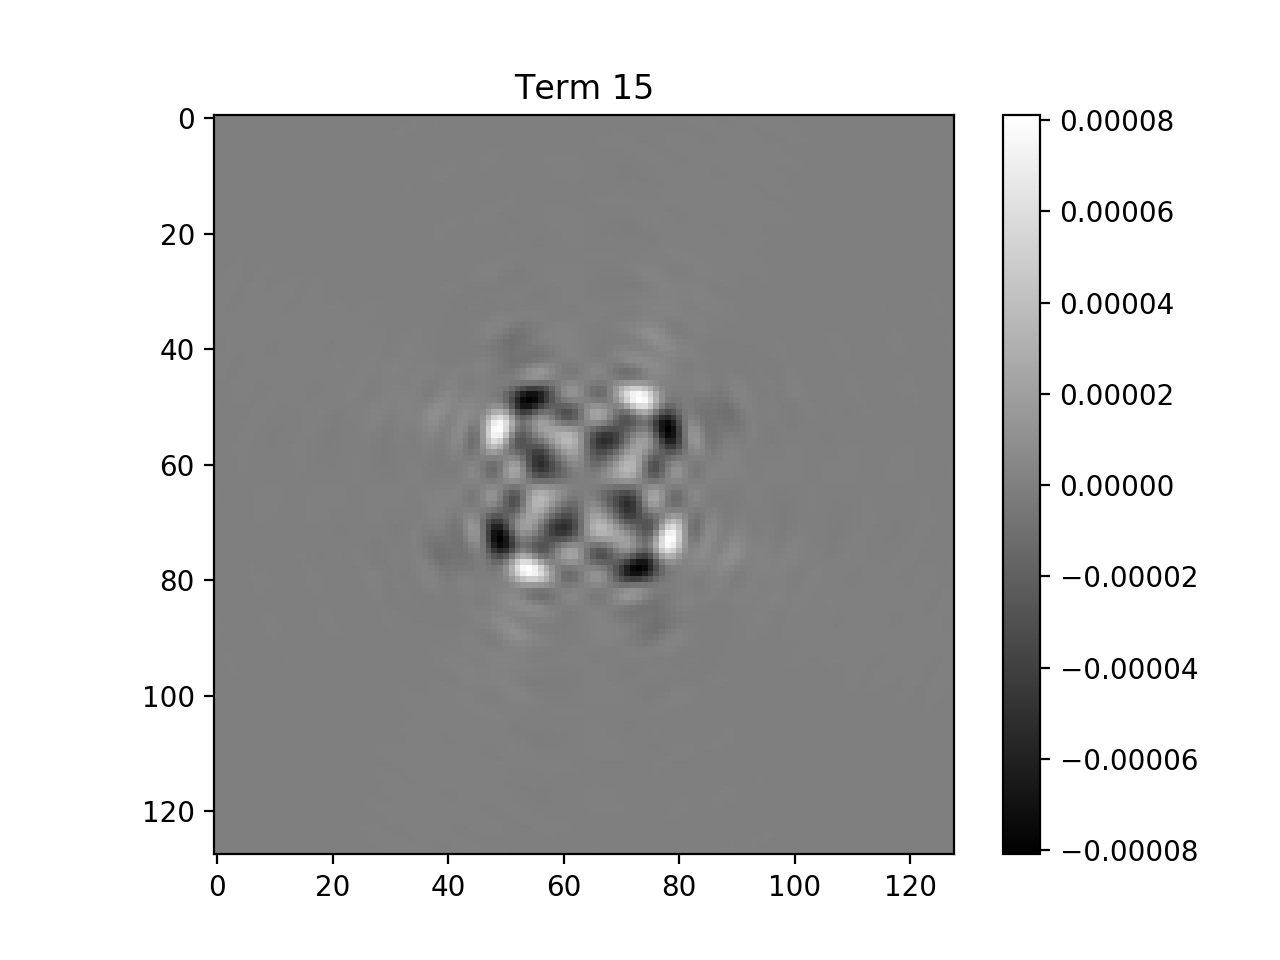

In [86]:
ref = data[:,:,0]
plt.figure()
plt.imshow(ref,cmap='gray')
plt.colorbar()
plt.title('Ref Image')
modes = np.zeros((N,N,M))
for i in range(M):
    modes[:,:,i] = data[:,:,i+1]-ref
    plt.figure()
    plt.imshow(modes[:,:,i],cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(i+2))
    

<IPython.core.display.Javascript object>


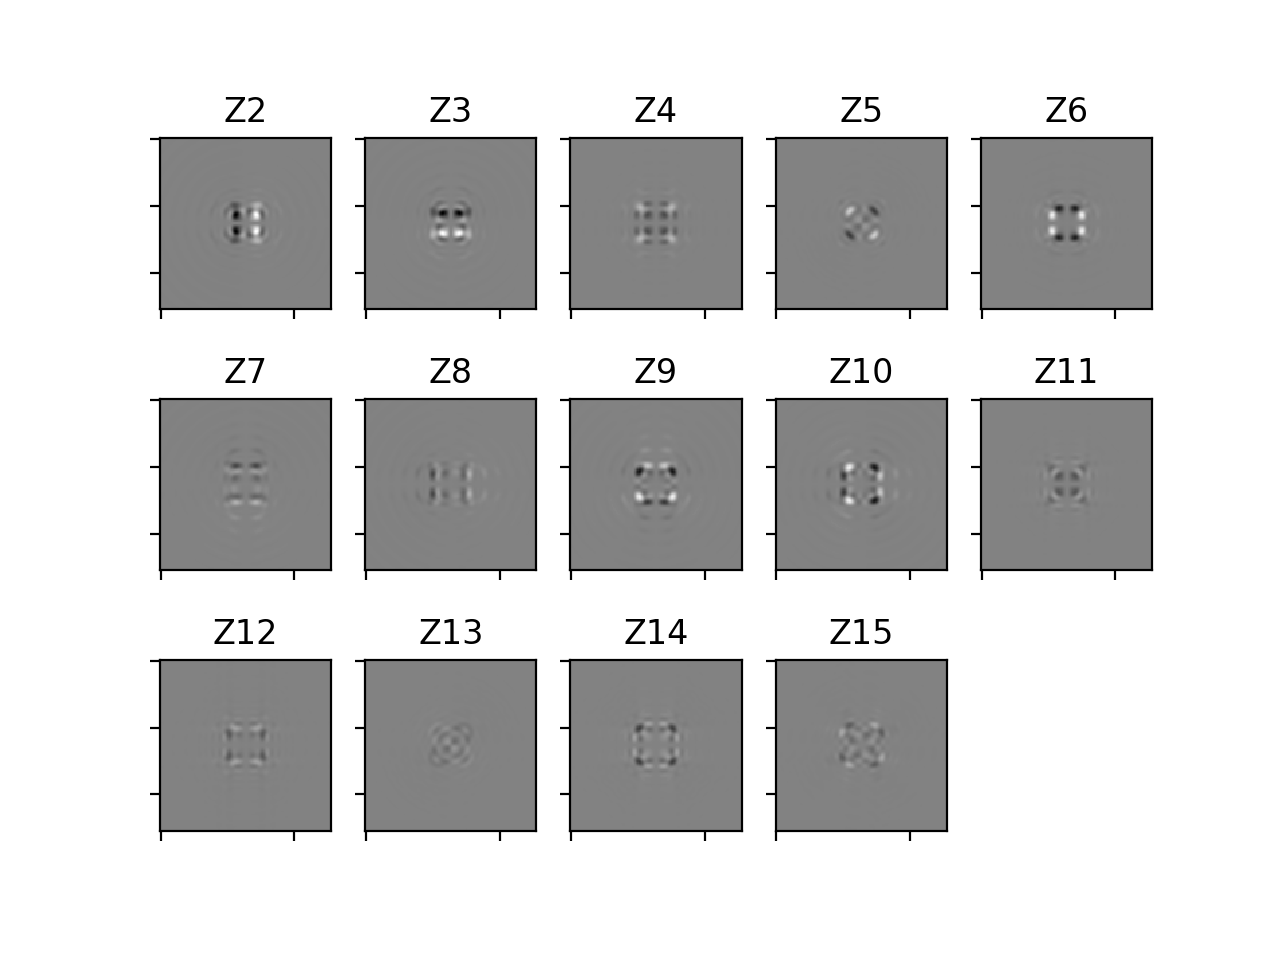

In [87]:
fig = plt.figure()
ax = fig.subplots(3,5)
cmax = np.max(modes)
cmin = np.min(modes)
for i in range(M):
    ax.flat[i].imshow(modes[:,:,i],cmap='gray',vmin=cmin,vmax=cmax)
    #ax[i].show_colorbar()
    ax.flat[i].set_title('Z'+str(i+2))
    ax.flat[i].set_xticklabels('')
    ax.flat[i].set_yticklabels('')
ax.flat[14].set_visible(False)

In [88]:
refdict = {'ref_image':ref}
scipy.io.savemat('ref_image_vortex_128px.mat',refdict)
modesdict = {'modes':modes}
scipy.io.savemat('cal_frames_vortex_128px.mat',modesdict)

In [89]:
A = np.zeros((N**2,M))
for i in range(M):
    A[:,i] = modes[:,:,i].ravel()

In [90]:
Apinv = np.linalg.pinv(A)
print(Apinv.shape)

(14, 16384)


In [91]:
testvec = modes[:,:,0].ravel()
print(testvec.shape)

(16384,)


In [92]:
np.dot(Apinv,testvec)

array([ 1.00000000e+00, -2.06223724e-16, -4.18137814e-17,  6.99399340e-17,
       -2.94428652e-16, -3.13456401e-16, -1.10046521e-16,  6.95328076e-16,
       -1.29399529e-16, -1.14274909e-16,  8.10441124e-18,  3.63729500e-16,
       -4.01124099e-17,  2.51453589e-16])

In [100]:
max_rms_phase = 100e-9
nEx = 70
step = 2*max_rms_phase/nEx
test_zernike = 11-2

wfe_array_test = np.zeros((M,nEx))
for i in range(nEx):
    wfe_array_test[:,i] = initial_array
    wfe_array_test[test_zernike,i] += -1*max_rms_phase + step*i
print(wfe_array_test[:,:3])
print(wfe_array_test[test_zernike,:])


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.00000000e-07 -9.71428571e-08 -9.42857143e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]
[-1.00000000e-07 -9.71428571e-08 -9.42857143e-08 -9.14285714e-08
 -8.85714286e-08 -8.57142857e-08 -8.28571429e-08 -8.00000000e-08
 -7.71428571e-08 -7.42857143e-08 -7.14285714e-08 -6.85714286e-08
 -6.57142857e-08 -6.28571429e-08 -6.00000000e-08 -5.71428571e-08
 -5.42857143e-08 -5.14285

In [101]:
#print(wfe_array_test[:,60])

In [102]:
test_data = simulate_multiple_llowfs(wfe_array_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defocus,vortex_charge=vortex_charge)

<IPython.core.display.Javascript object>


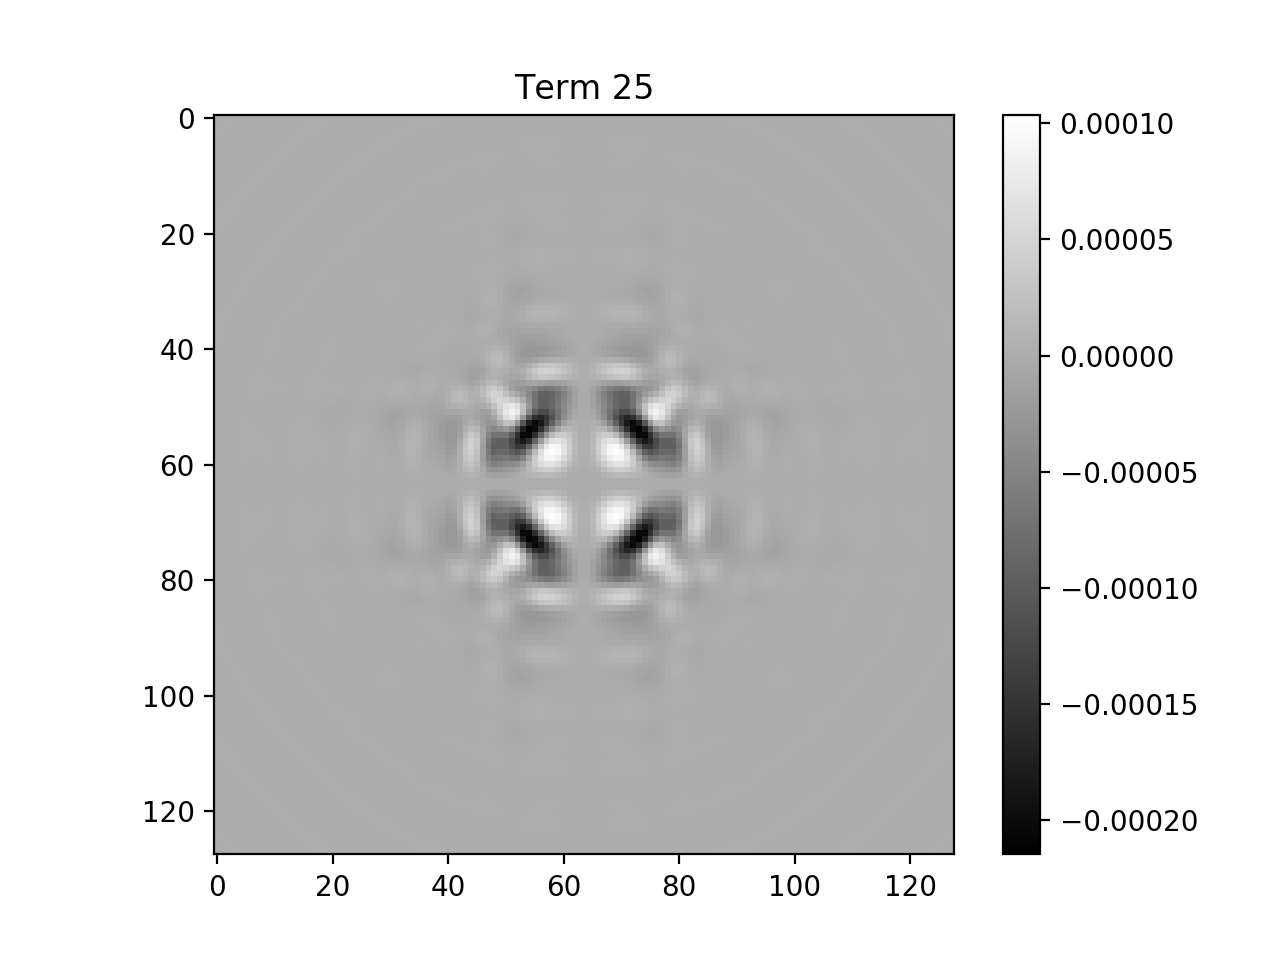

<IPython.core.display.Javascript object>


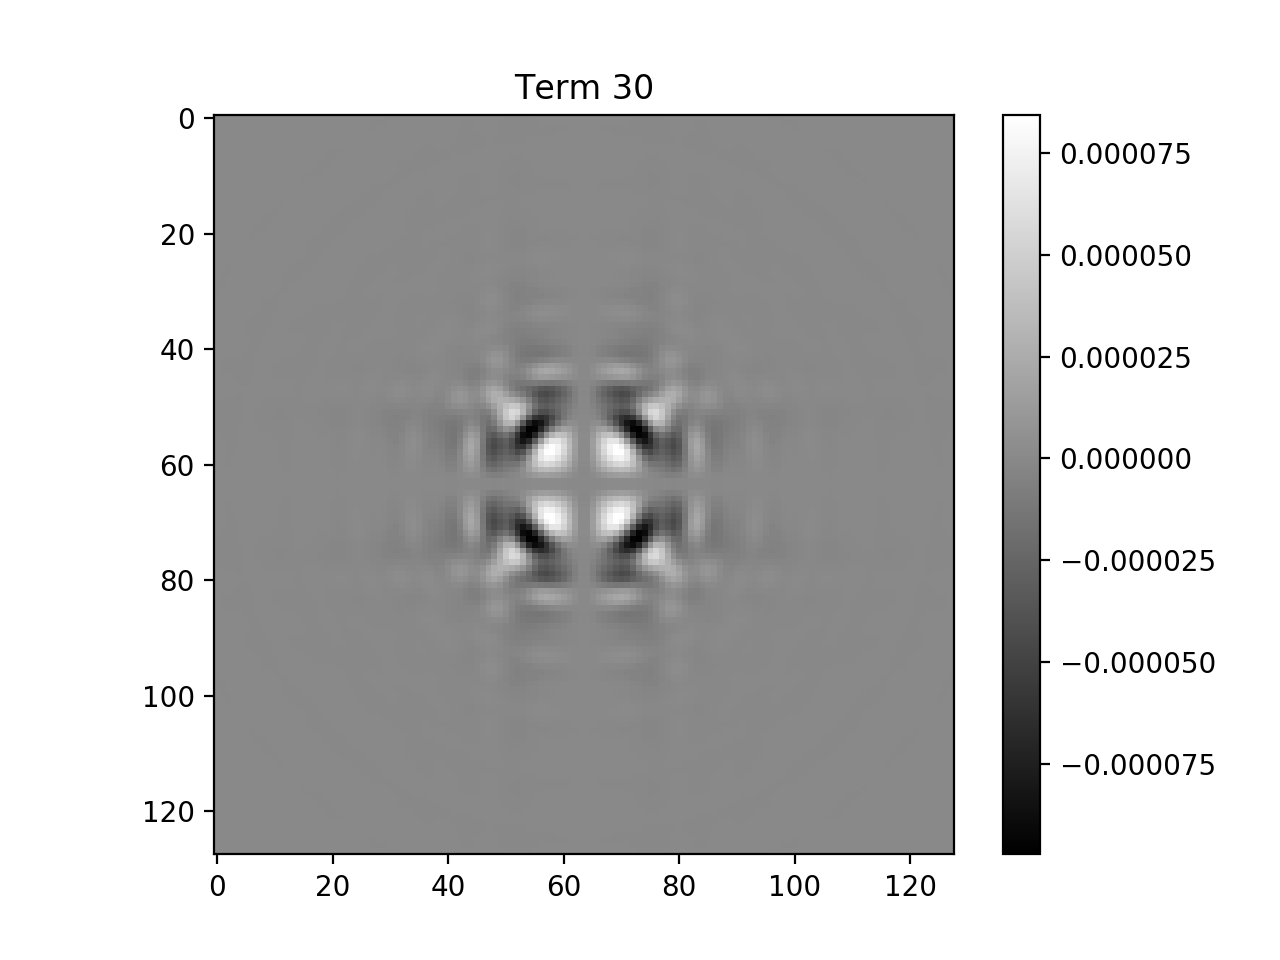

<IPython.core.display.Javascript object>


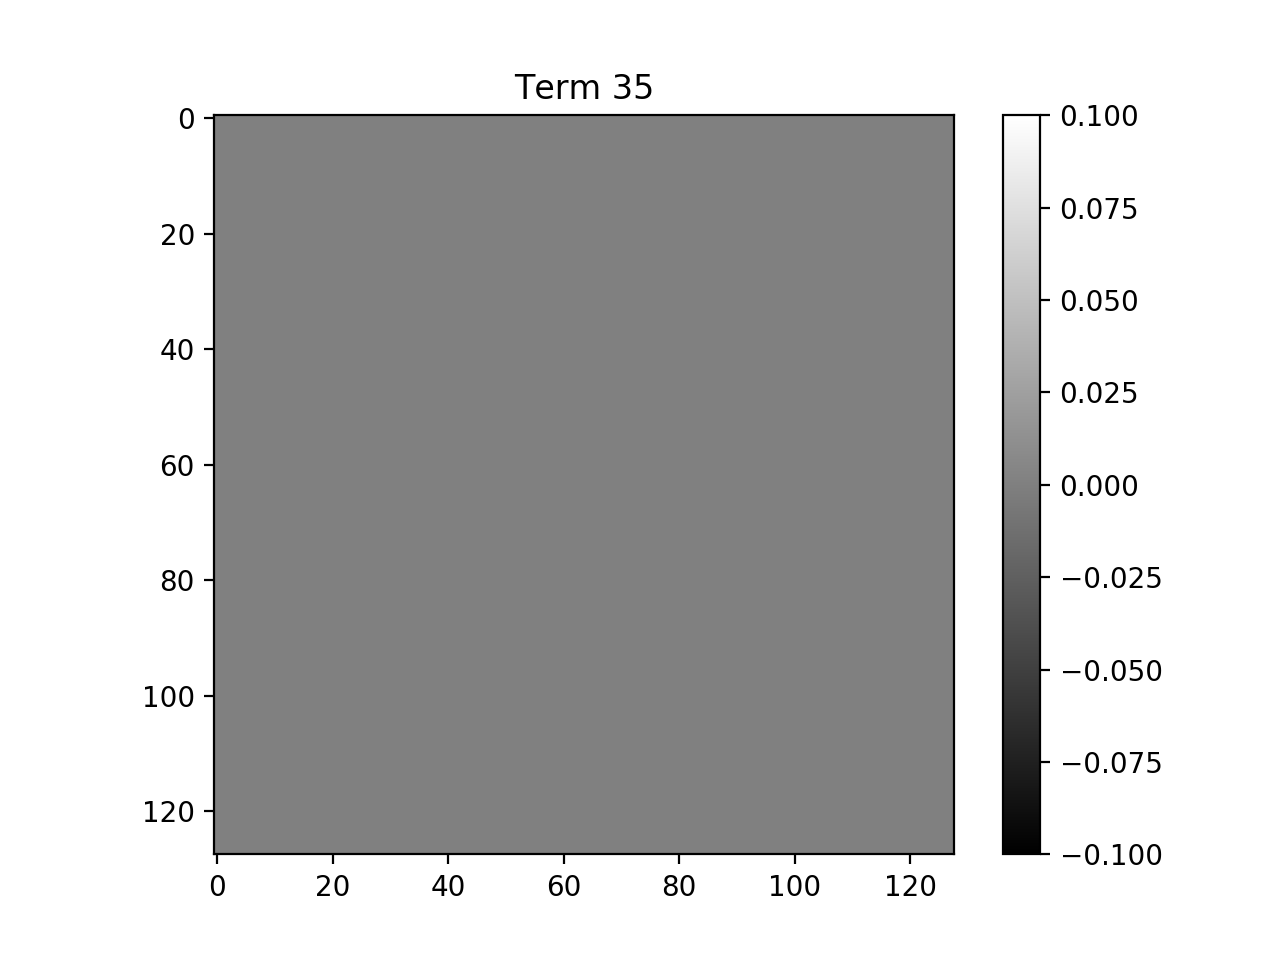

<IPython.core.display.Javascript object>


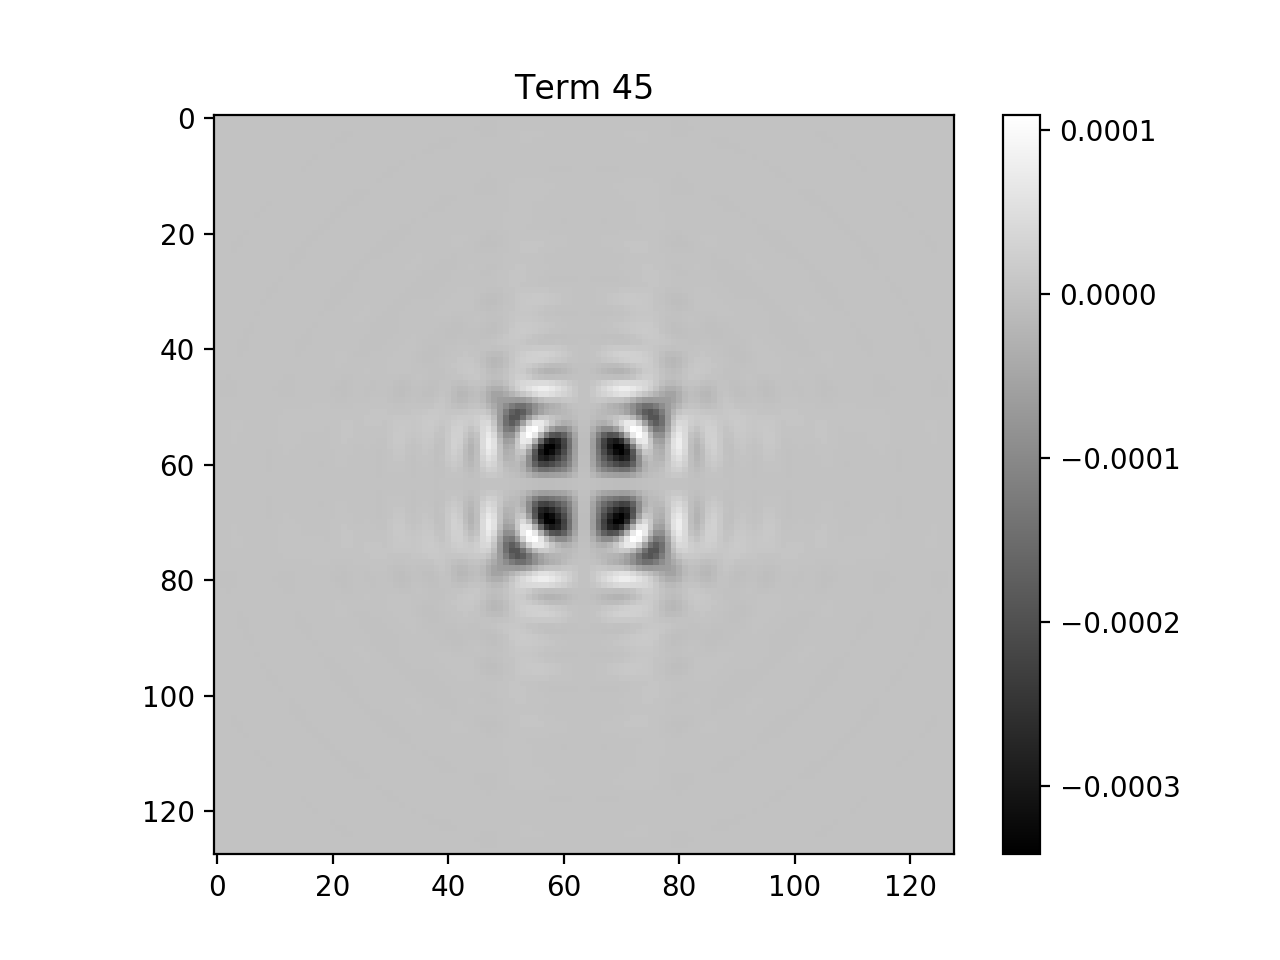

In [103]:
to_plot = [25,30,35,45]
for k in to_plot:
    plt.figure()
    plt.imshow(test_data[:,:,k]-ref,cmap='gray')
    plt.colorbar()
    plt.title('Term '+str(k))

In [104]:
test_results = np.zeros((nEx,M))

for i in range(nEx):
    pixels = (test_data[:,:,i]-ref).ravel()
    calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
    test_results[i,:] = calc_coeffs

In [105]:
print(test_results.shape)
print(test_results[23,:])

(70, 14)
[ 4.32604115e-10  3.93036886e-10  2.24079947e-09  4.04671757e-11
  1.42511424e-09  5.23382697e-09  3.18649202e-09  1.83264044e-09
 -4.71227709e-10 -1.99182219e-08  6.73396210e-09  1.11117162e-08
  1.27188553e-09  3.02693609e-09]


[(0.0, 0.0, 0.502, 1.0), (0.0, 0.26598627808136, 0.2827249433106577, 1.0), (0.0, 0.3874016993464051, 1.0, 1.0), (0.0, 0.930796862745098, 1.0, 1.0), (0.0, 0.9804, 0.5731160158460669, 1.0), (0.14987017543859635, 0.940799477124183, 0.0, 1.0), (0.4537607843137255, 0.9104032258064516, 0.0, 1.0), (0.6967515786278082, 1.0, 0.20299988662131535, 1.0), (1.0, 0.9710620522161504, 0.0, 1.0), (1.0, 0.8066418943533695, 0.021098823529411777, 1.0), (1.0, 0.44038591378263514, 0.021972448979591816, 1.0), (1.0, 0.055951700680272, 0.0, 1.0), (0.9462666666666665, 0.026863261296660175, 1.0, 1.0), (0.7377776686313035, 0.31468245294474795, 0.971711414693382, 1.0), (0.9486490196078431, 0.6636764705882352, 0.9555771241830066, 1.0), (0.9961, 0.9725, 0.9961, 1.0)]


<IPython.core.display.Javascript object>


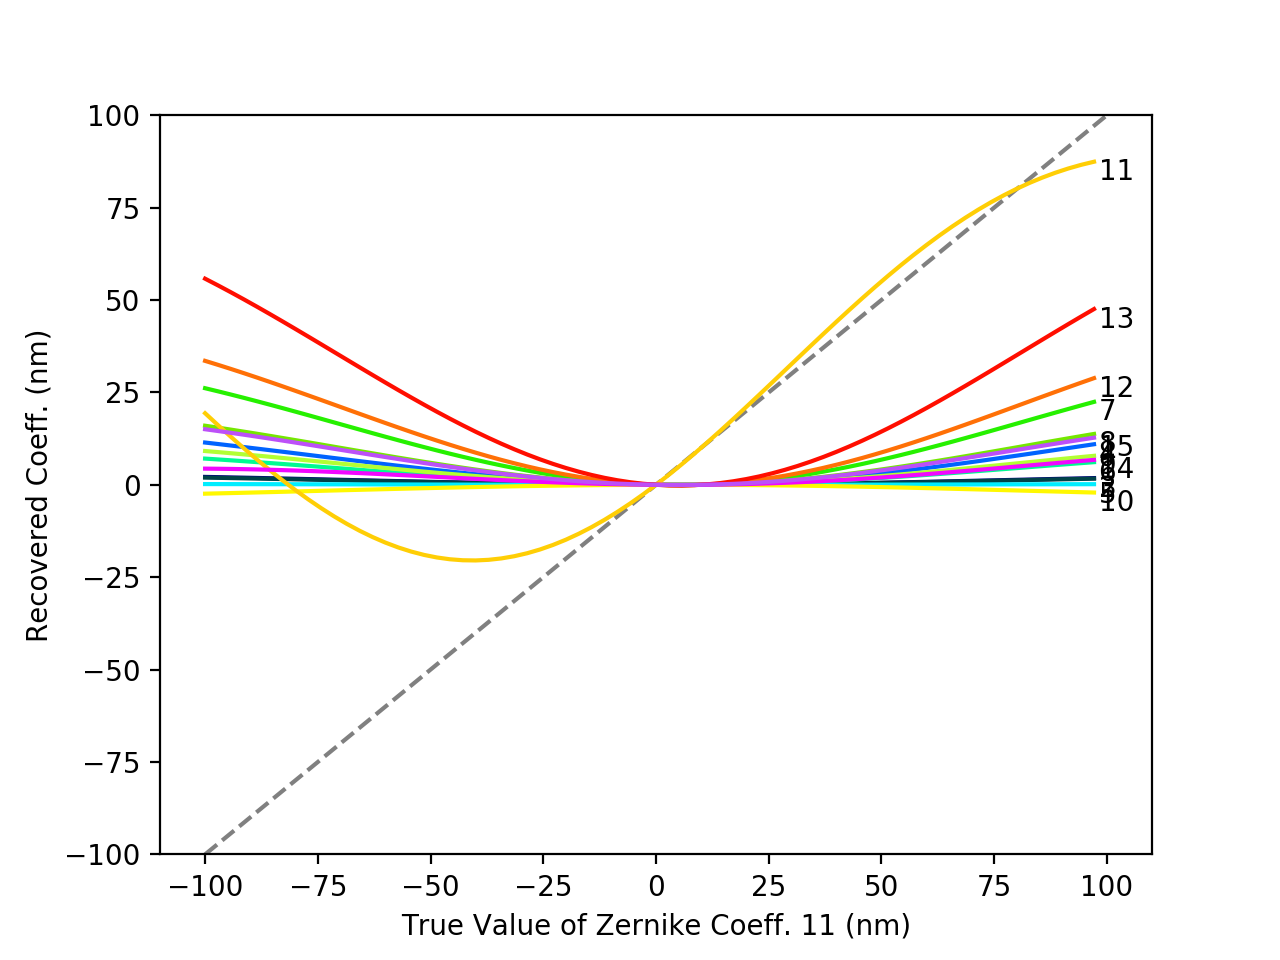

(-100, 100)

In [106]:
to_plot = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
#colormap = plt.cm.nipy_spectral
colormap = plt.cm.gist_ncar
colorcycle = [colormap(c) for c in np.linspace(0, 1,len(to_plot)+2)]
print(colorcycle)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in to_plot:
    ax1.text((wfe_array_test[test_zernike,-1]+1e-9)*1e9,(test_results[-1,i])*1e9-5,str(to_plot[i]+2))
    ax1.plot(wfe_array_test[test_zernike,:]*1e9,test_results[:,i]*1e9)
ax1.set_xlabel('True Value of Zernike Coeff. ' + str(test_zernike+2) + ' (nm)')
ax1.set_ylabel('Recovered Coeff. (nm)')
ax1.set_ylim([-100,100])
#plt.show()

In [129]:
max_rms_phase = 100e-9
nExDefoc = 30
step = 2*max_rms_phase/nExDefoc

wfe_array_defoc_test = np.zeros((M,nExDefoc))
for i in range(nExDefoc):
    wfe_array_defoc_test[2,i] += -1*max_rms_phase + step*i

In [130]:
#plot defocus response with different values of defocus
#defocus_radians = np.arange(0,3*np.pi,np.pi/4)
defocus_radians = np.array([1,2,3,4,5])
defocus_waves = defocus_radians/(2*np.pi)
nDef = np.size(defocus_waves)

defoc_results = np.zeros((nExDefoc,nDef))

for k,defoc in enumerate(defocus_waves):
    wfe_array = np.zeros((M,M+1))
    for i in range(M):
        wfe_array[i,i+1] = rms_phase_mode
    data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
                    coronagraph=coronagraph,pixelscale=detector_pixelscale,\
                    npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge)
    ref = data[:,:,0]
    modes = np.zeros((N,N,M))
    for i in range(M):
        modes[:,:,i] = data[:,:,i+1]-ref
    A = np.zeros((N**2,M))
    for i in range(M):
        A[:,i] = modes[:,:,i].ravel()
    Apinv = np.linalg.pinv(A)
    defoc_test_data = simulate_multiple_llowfs(wfe_array_defoc_test,None,oversample=oversample,wavelength=wavelength,coronagraph=coronagraph,pixelscale=detector_pixelscale,npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,vortex_charge=vortex_charge)
    test_results = np.zeros((nExDefoc,M))
    for i in range(nExDefoc):
        pixels = (defoc_test_data[:,:,i]-ref).ravel()
        calc_coeffs = np.dot(Apinv,pixels)*rms_phase_mode
        test_results[i,:] = calc_coeffs
    
    defoc_results[:,k] = test_results[:,2]


<IPython.core.display.Javascript object>


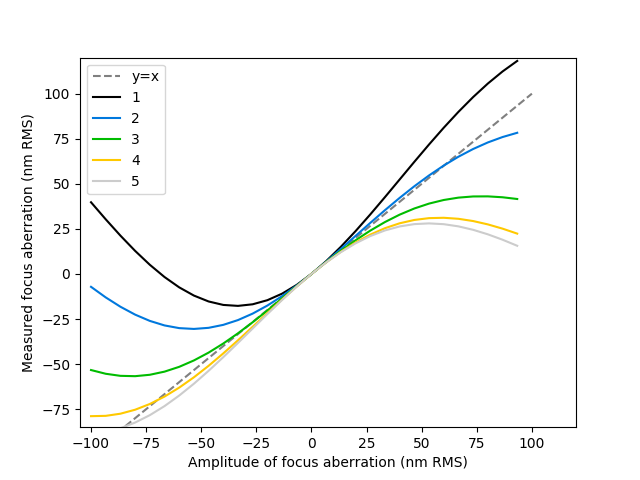

Text(0, 0.5, 'Measured focus aberration (nm RMS)')

In [131]:
colormap = plt.cm.nipy_spectral
#nipy_spectral
colorcycle = [colormap(c) for c in np.linspace(0, 1,nDef)]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_prop_cycle(color=colorcycle)
ax1.plot([-100,100],[-100,100],linestyle='--',color='grey')
for i in range(nDef):
    ax1.plot(wfe_array_defoc_test[2,:]*1e9,defoc_results[:,i]*1e9)
    #ax1.text(wfe_array_defoc_test[2,-1]*1e9,defoc_results[-1,i]*1e9,str(defocus_radians[i]))
ax1.legend(['y=x']+[str(d) for d in defocus_radians])
ax1.set_xlim([-105,120])
ax1.set_ylim([-85,120])
ax1.set_xlabel('Amplitude of focus aberration (nm RMS)')
ax1.set_ylabel('Measured focus aberration (nm RMS)')

In [10]:
#plot difference of spherical and defocus modes for different values of sensor defocus
defocus_radians = np.array([-5,5,10,20,30,40,50])
defocus_waves = defocus_radians/(2*np.pi)
nDef = np.size(defocus_waves)

wfe_ref_foc_sph = np.zeros((M,3))
wfe_ref_foc_sph[2,1] = 1e-9
wfe_ref_foc_sph[9,2] = 1e-9

refs = np.zeros((N,N,nDef))
modes_foc = np.zeros((N,N,nDef))
modes_sph = np.zeros((N,N,nDef))

for k,defoc in enumerate(defocus_waves):
    data = simulate_multiple_llowfs(wfe_array,None,oversample=oversample,wavelength=wavelength,\
                    coronagraph='fqpm',pixelscale=detector_pixelscale,\
                    npix_detector=npix_detector,npix_pupil=npix_pupil,sensor_defocus=defoc,obscuration=True)
    refs[:,:,k] = data[:,:,0]
    modes_foc[:,:,k] = data[:,:,1]
    modes_sph[:,:,k] = data[:,:,2]
    
    

<IPython.core.display.Javascript object>


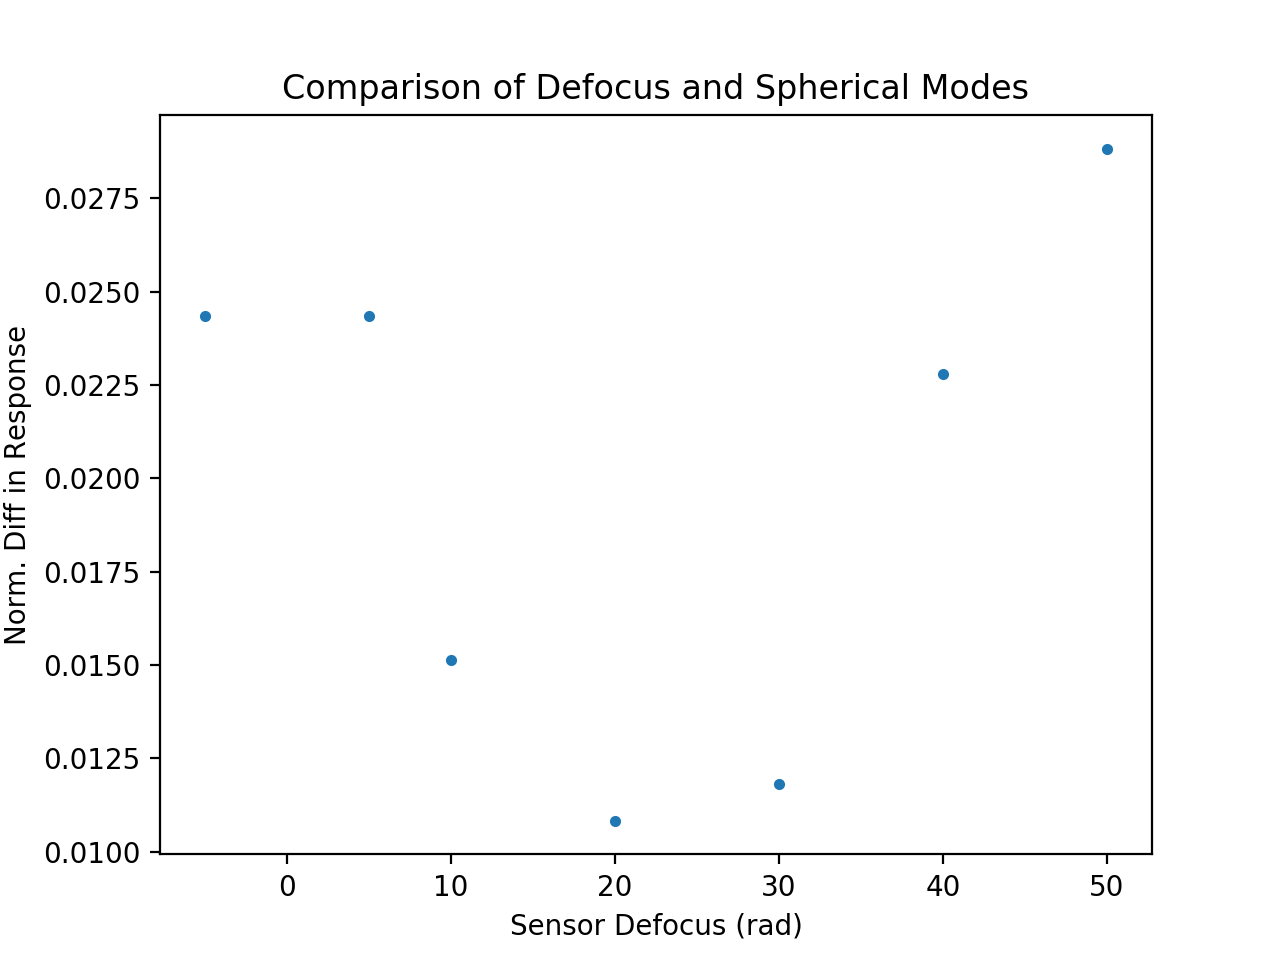

Text(0, 0.5, 'Norm. Diff in Response')

In [11]:
fom = np.zeros((nDef,))
for i in range(nDef):
    fom[i] = np.max(np.abs(modes_foc[:,:,i]-modes_sph[:,:,i])/np.max(refs[:,:,i]))
plt.figure()
plt.plot(defocus_radians,fom,'.')
plt.title('Comparison of Defocus and Spherical Modes')
plt.xlabel('Sensor Defocus (rad)')
plt.ylabel('Norm. Diff in Response')

In [166]:
file = 'vortex_C4_Z15_individual_400step_948nm_128px1.hdf5'
#file = 'fqpm_50nm_256px_individual_zernikes.hdf5'
with h5py.File(file, 'r') as hf:
    coeffs = np.array(hf.get('zernike_coeffs'))
    images = np.array(hf.get('images'))
print(coeffs.shape)
print(images.shape)

(14, 5600)
(128, 128, 5600)


In [17]:
print(coeffs[:,:3])

[[-1.00000000e-07 -9.94987469e-08 -9.89974937e-08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [167]:
K = 400
coeffs_sep = np.zeros((M,K,M))

In [168]:
for i in range(M):
    coeffs_sep[:,:,i] = coeffs[:,i*K:(i+1)*K]

In [182]:
coeffs_sep[:,:3,2]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.48000000e-07, -9.43248120e-07, -9.38496241e-07],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [170]:
rec_coeffs = np.zeros(coeffs_sep.shape)
for i in range(M): #loop over coefficients
    for j in range(K): #loop over examples
        vec = np.reshape(images[:,:,i*K+j]-ref,(-1,)) 
        rec_coeffs[:,j,i] = np.dot(Apinv,vec)

In [171]:
print(rec_coeffs[:,:3,0])

[[-1.66091994e-01 -1.65888482e-01 -1.65801060e-01]
 [-1.29379325e-01 -1.29194816e-01 -1.28958569e-01]
 [ 4.00845506e+00  4.00949126e+00  4.01050458e+00]
 [-9.51911676e-02 -9.59031126e-02 -9.63828347e-02]
 [ 1.06446668e-02  1.18065743e-02  1.31268033e-02]
 [ 1.12164966e-01  1.13825395e-01  1.15785786e-01]
 [-2.37220632e-02 -2.26290002e-02 -2.15072546e-02]
 [-6.26469723e-02 -6.23135011e-02 -6.18951606e-02]
 [-8.65459940e-02 -8.59618226e-02 -8.54648212e-02]
 [ 1.51491168e+01  1.51529010e+01  1.51572860e+01]
 [ 1.25958300e-01  1.29322295e-01  1.33035706e-01]
 [-4.27481785e-03 -6.15485549e-03 -7.49202623e-03]
 [ 1.28569288e-01  1.29648998e-01  1.30892974e-01]
 [-2.35612073e-01 -2.36723682e-01 -2.37658246e-01]]


<IPython.core.display.Javascript object>


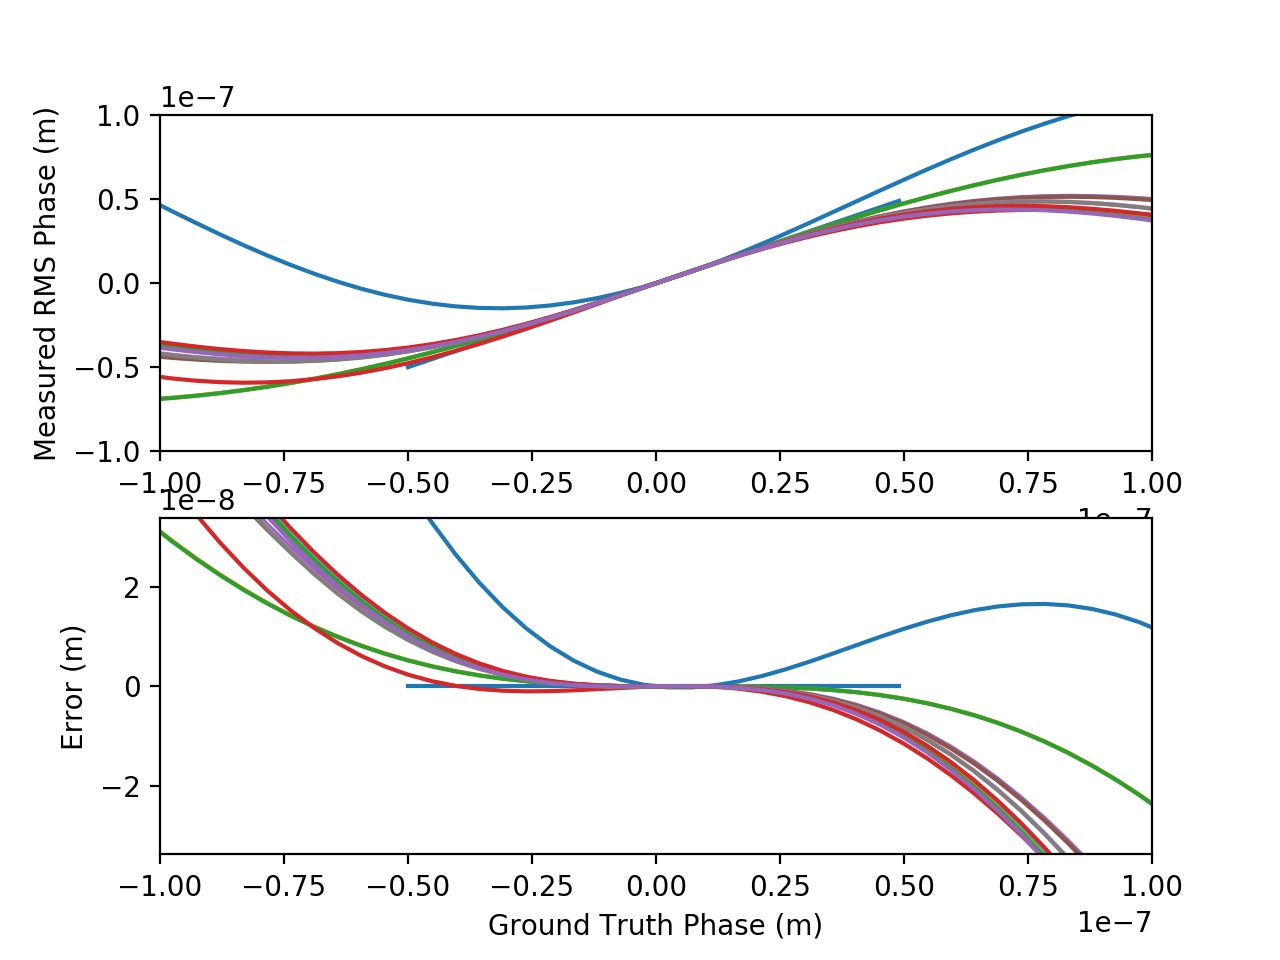

In [172]:
fig,ax = plt.subplots(2,1)
line1 = np.arange(-5e-8,5e-8,1e-9)
line0 = np.zeros(line1.shape)
ax[0].plot(line1,line1)
ax[1].plot(line1,line0)
for i in range(M):
#for i in [2,1,]:
    ax[0].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode)
    #ax[0].axis('equal')
    ax[0].set_xlim([-100e-9,100e-9])
    ax[0].set_ylim([-100e-9,100e-9])
    ax[0].set_ylabel('Measured RMS Phase (m)')
    #ax[0].legend(['None','1','2','3','4','5','6'])
    ax[1].plot(coeffs_sep[i,:,i],rec_coeffs[i,:,i]*rms_phase_mode-coeffs_sep[i,:,i])
    ax[1].axis('equal')
    ax[1].set_xlim([-100e-9,100e-9])
    ax[1].set_ylim([-10e-9,10e-9])
    ax[1].set_ylabel('Error (m)')
    ax[1].set_xlabel('Ground Truth Phase (m)')

<IPython.core.display.Javascript object>


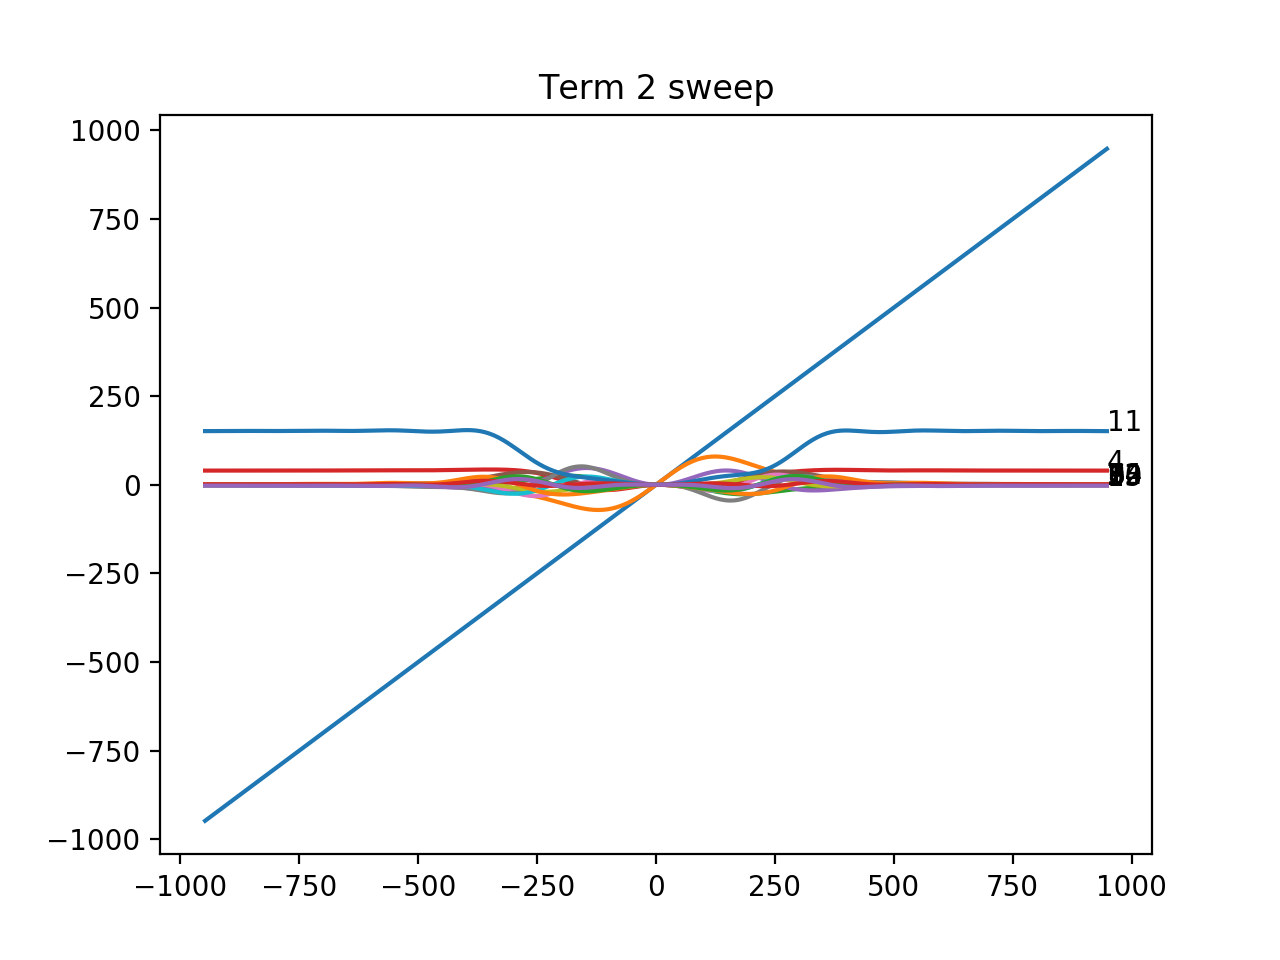

<IPython.core.display.Javascript object>


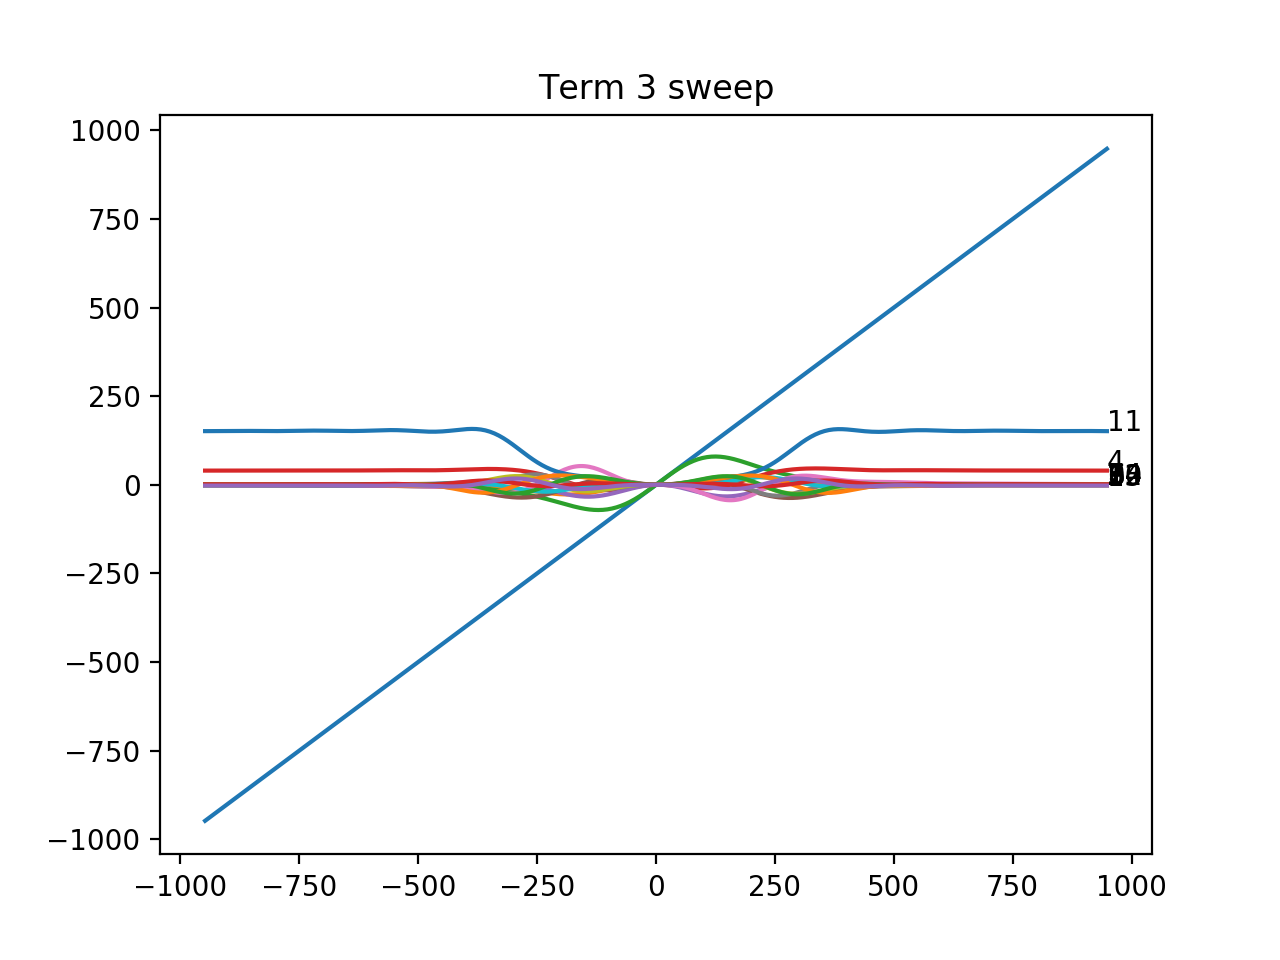

<IPython.core.display.Javascript object>


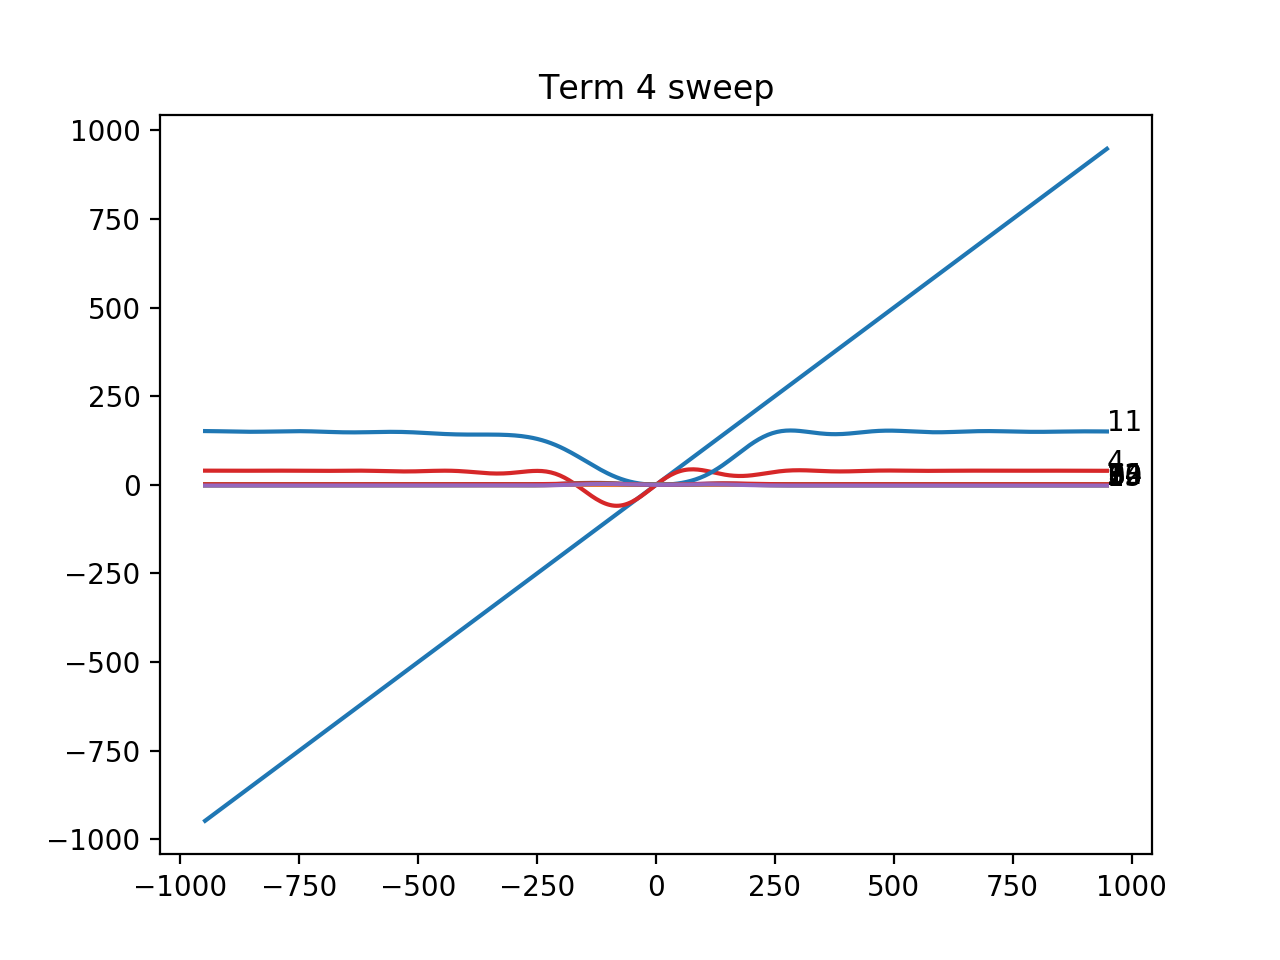

<IPython.core.display.Javascript object>


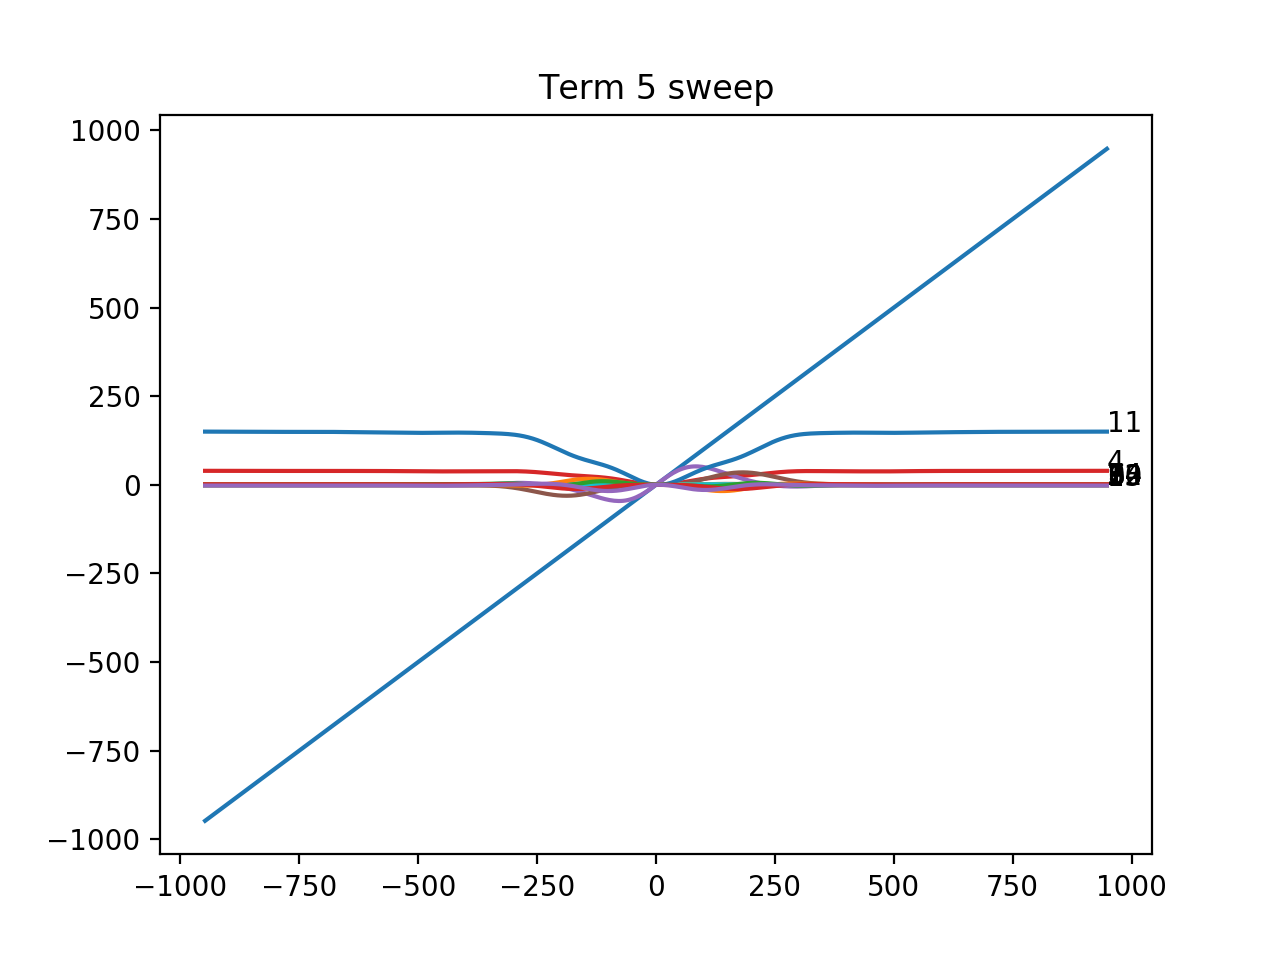

<IPython.core.display.Javascript object>


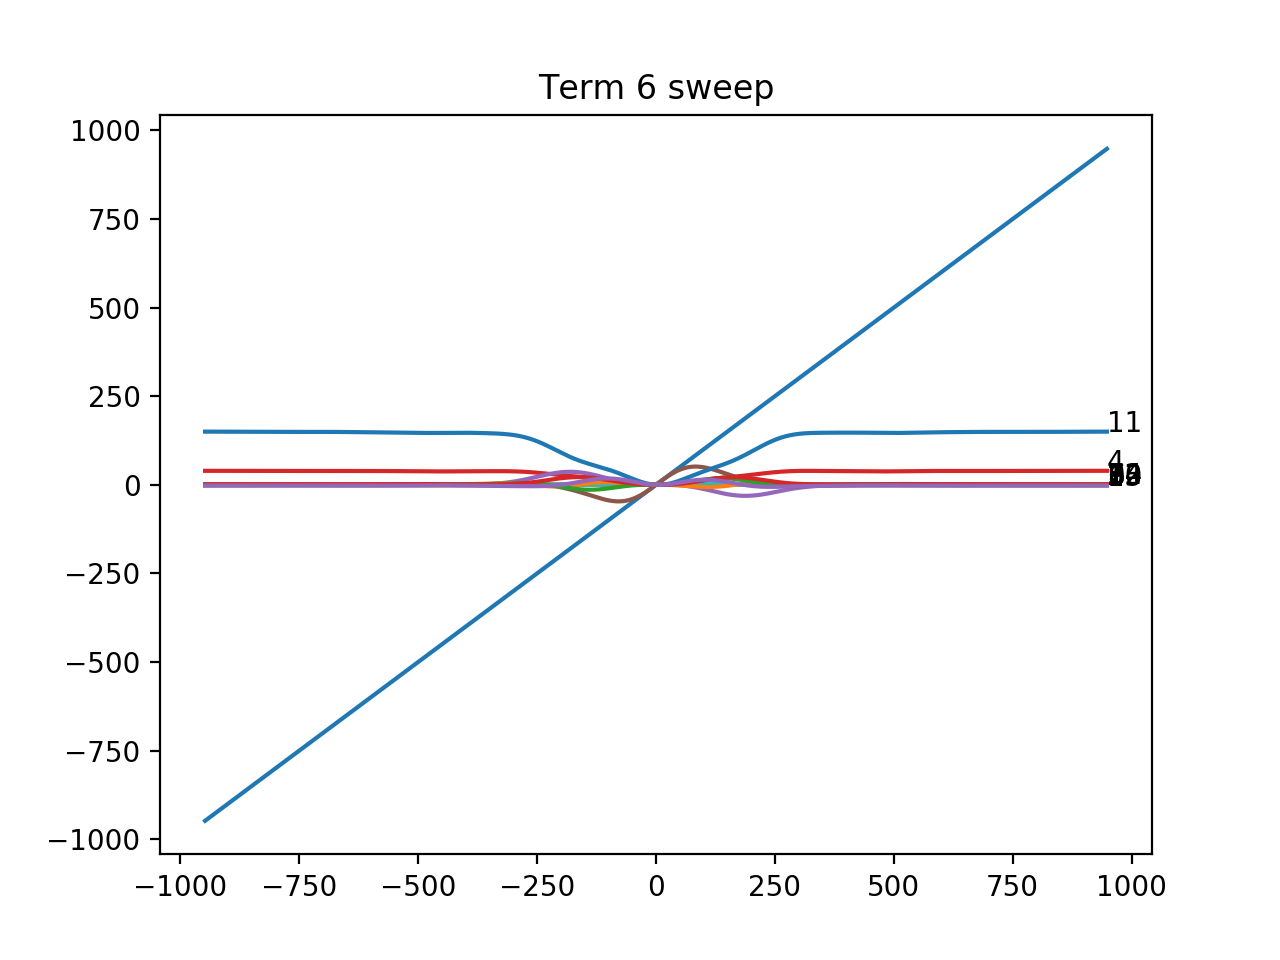

<IPython.core.display.Javascript object>


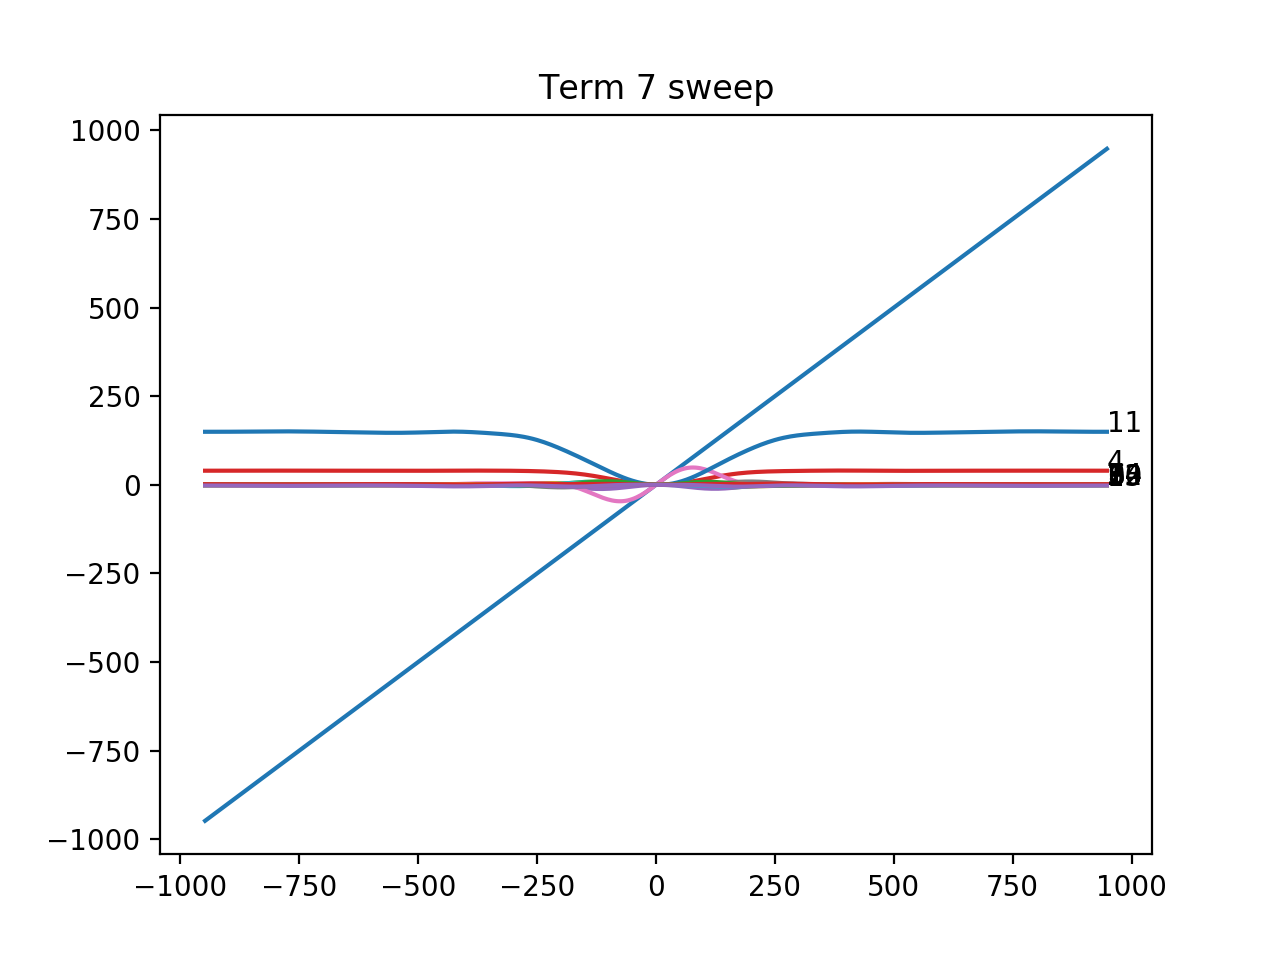

<IPython.core.display.Javascript object>


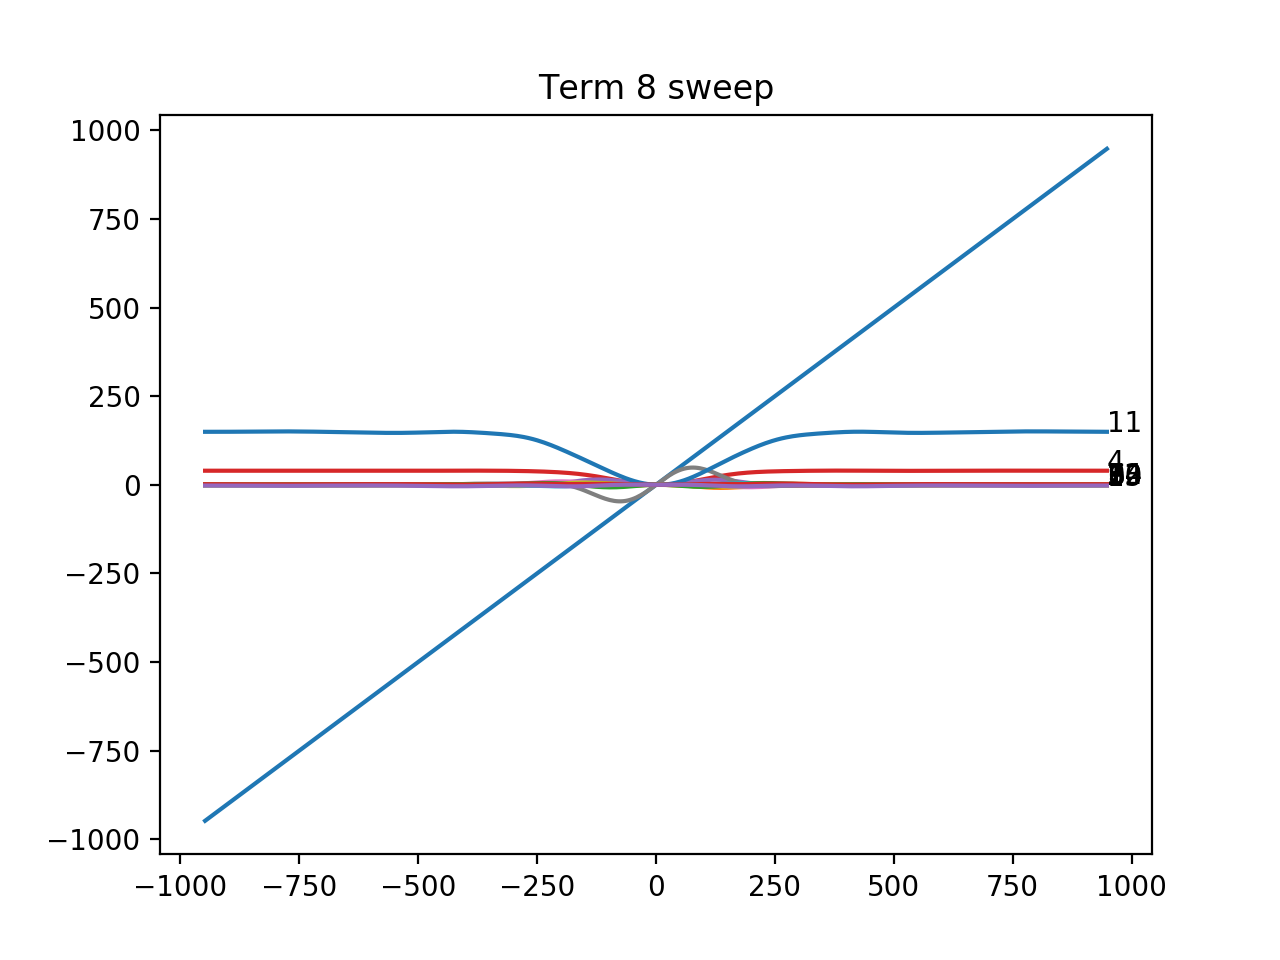

<IPython.core.display.Javascript object>


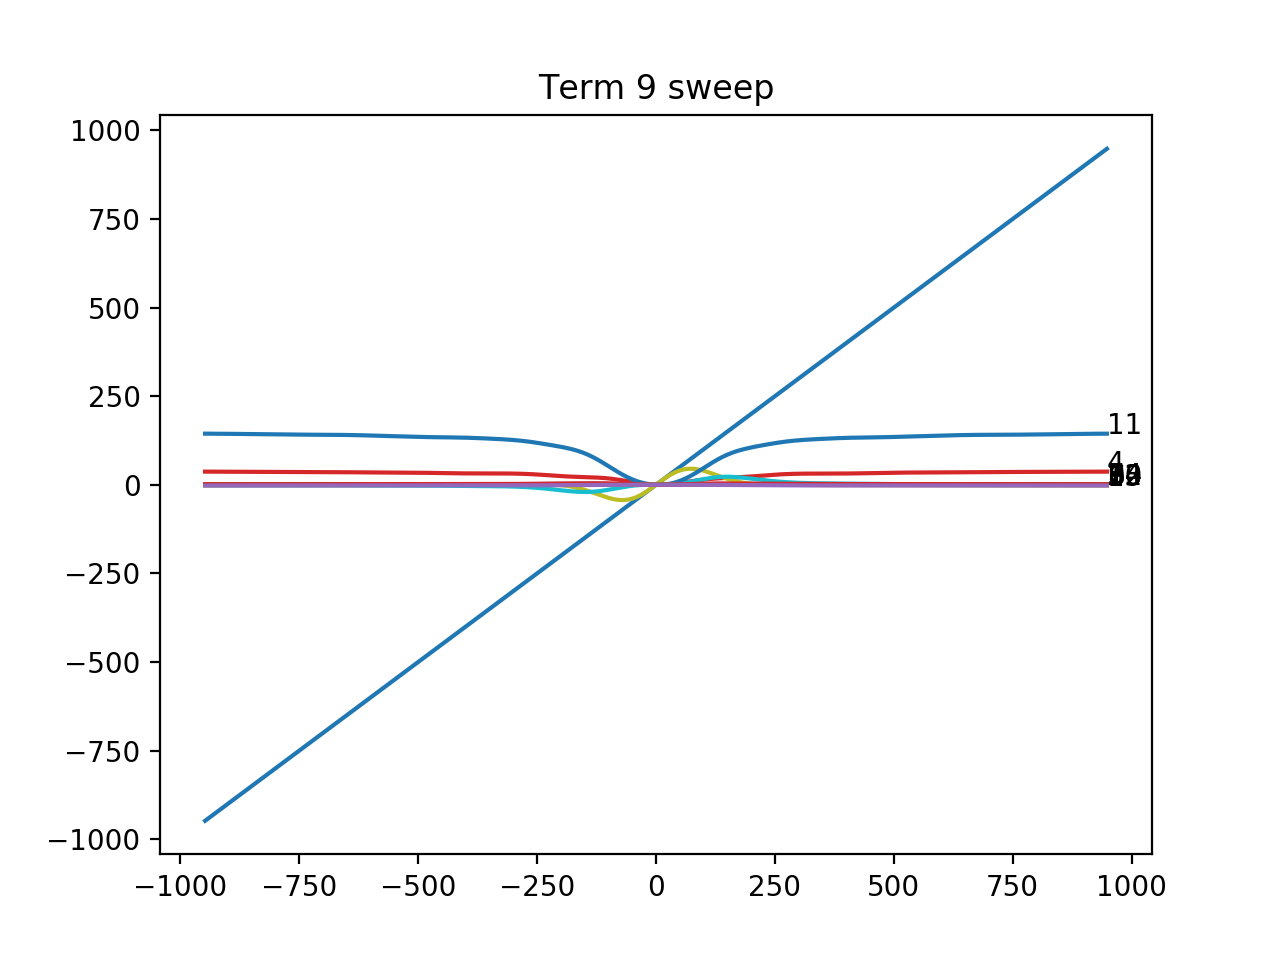

<IPython.core.display.Javascript object>


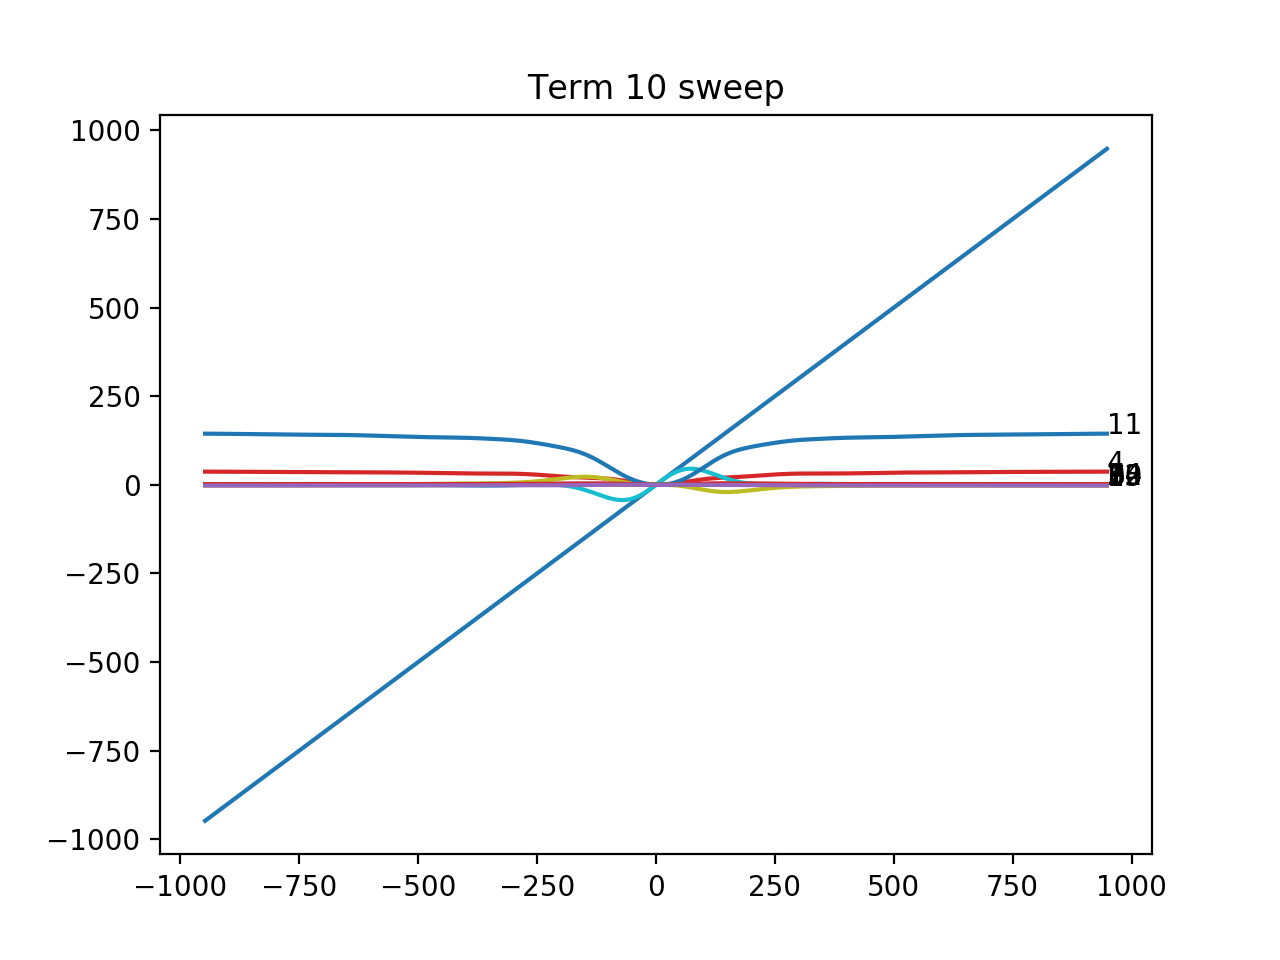

<IPython.core.display.Javascript object>


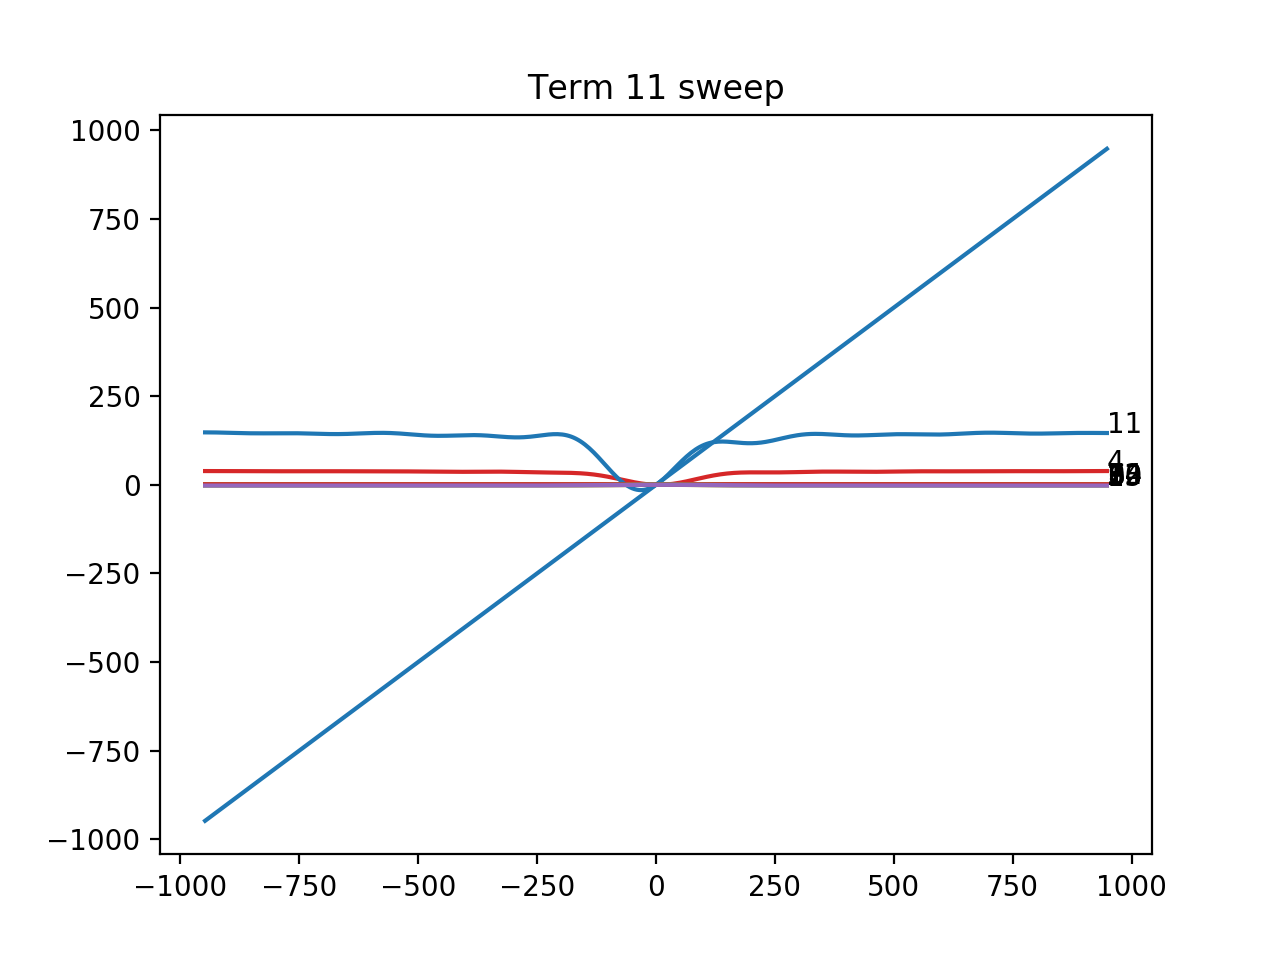

<IPython.core.display.Javascript object>


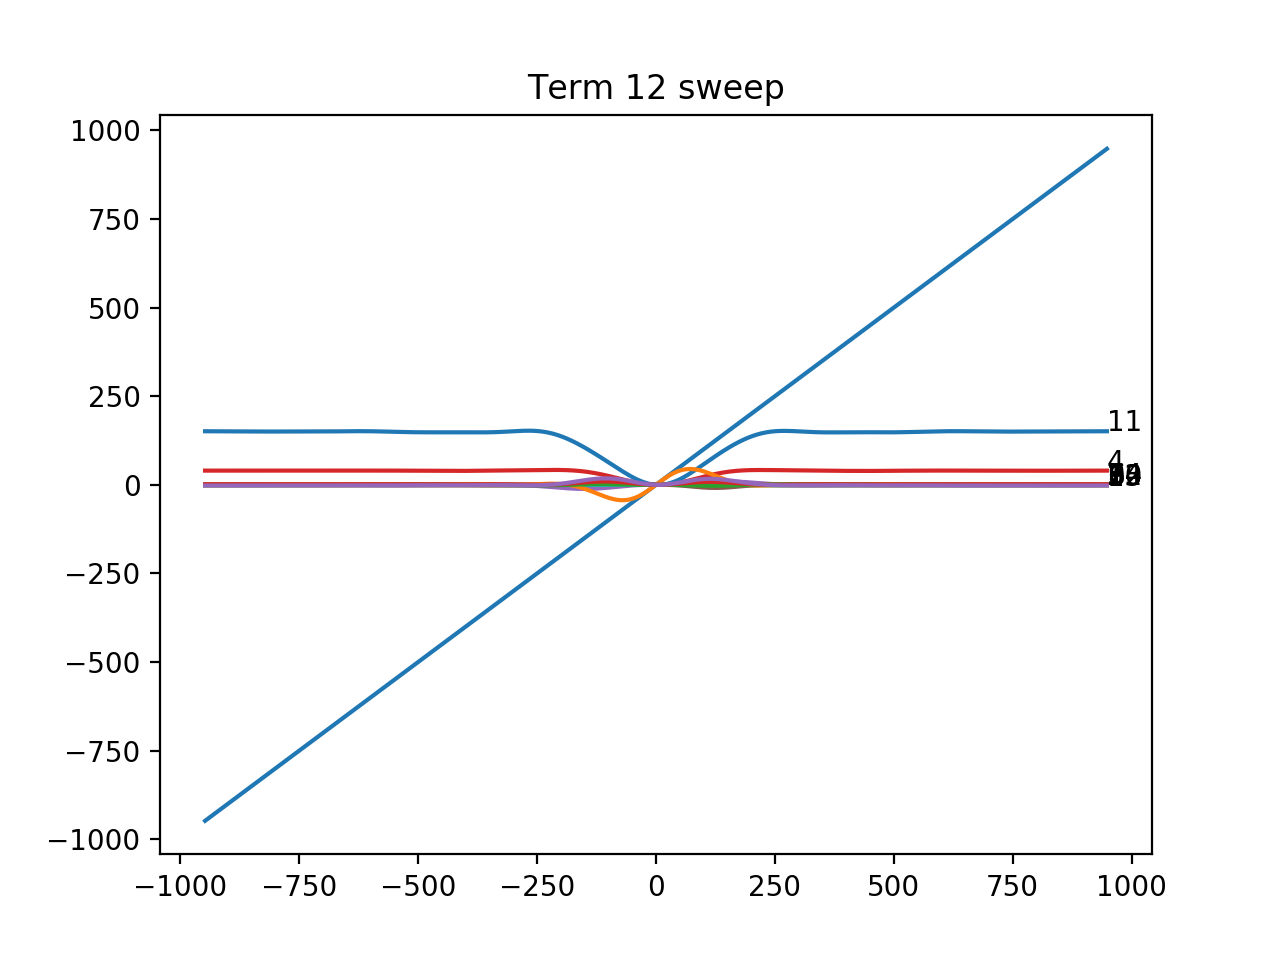

<IPython.core.display.Javascript object>


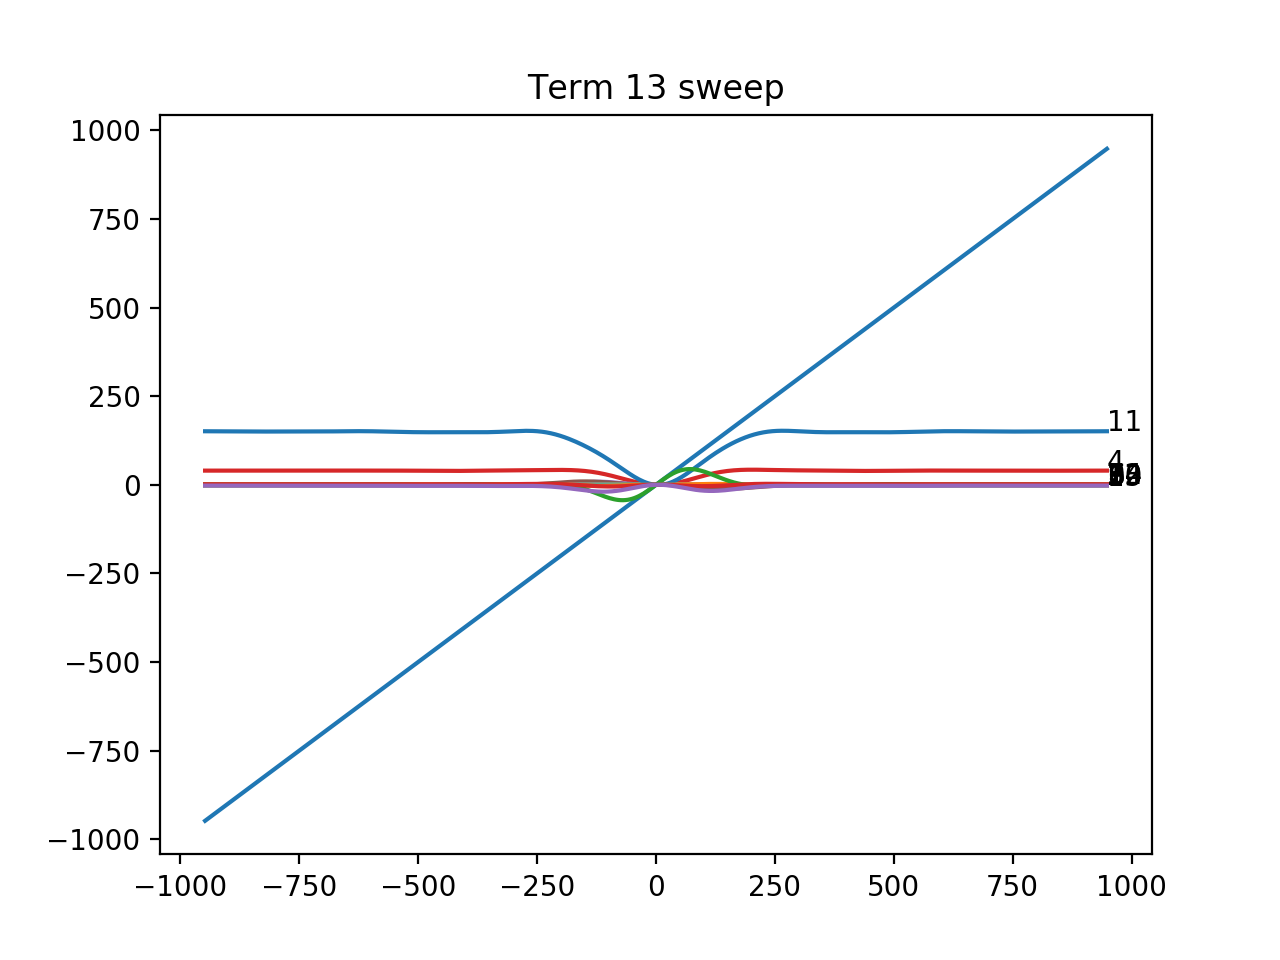

<IPython.core.display.Javascript object>


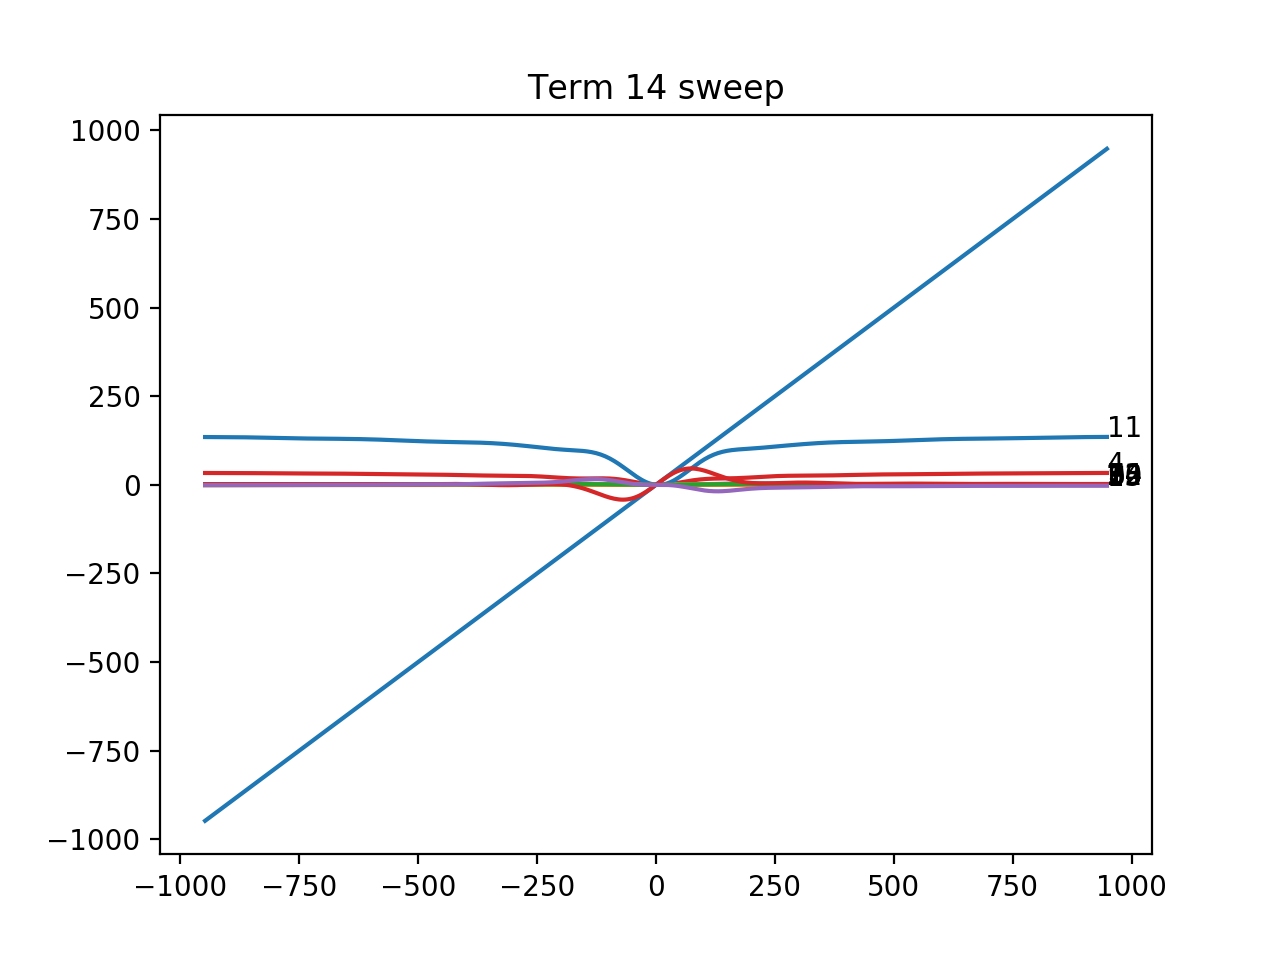

<IPython.core.display.Javascript object>


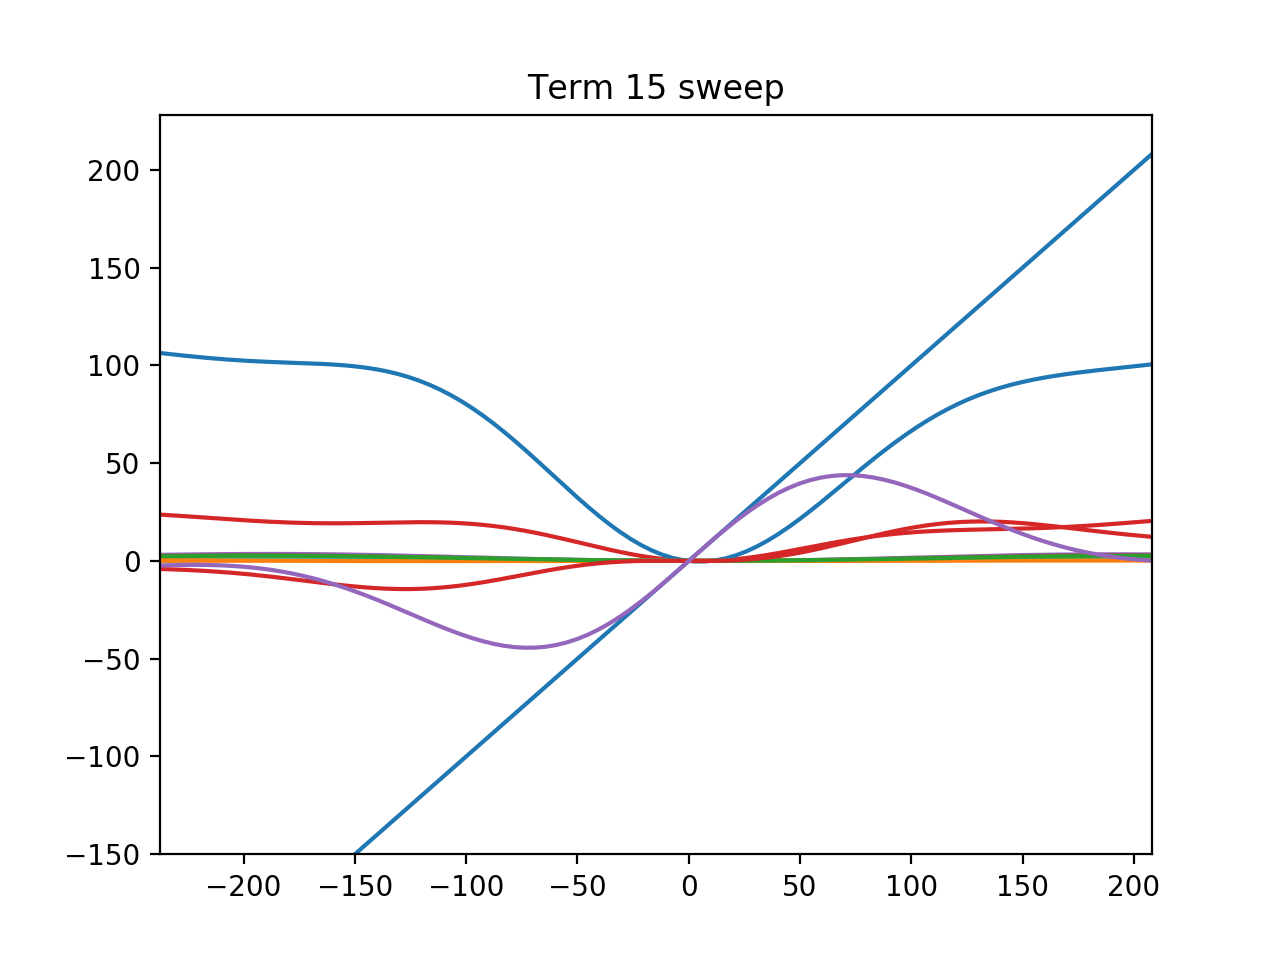

In [188]:

for ii in range(M):
    plt.figure()
    plt.title('Term ' + str(ii+2) + ' sweep')
    plt.plot([-948,948],[-948,948])
#for i in [2,1,]:
    for jj in range(M):
        plt.plot(coeffs_sep[ii,:,ii]*1e9,rec_coeffs[jj,:,ii]*rms_phase_mode*1e9)
        plt.text(coeffs_sep[ii,-1,ii]*1e9,rec_coeffs[jj,-1,ii]*rms_phase_mode*1e9,str(jj+2))
        #plt.set_ylabel('Measured RMS Phase (m)')



In [24]:
truth = np.zeros((K,M))
reconstruction = np.zeros((K,M))
for i in range (M):
    truth[:,i] = coeffs_sep[i,:,i]
    reconstruction[:,i] = rec_coeffs[i,:,i]
    
mat_out = {
    'truth':truth,
    'reconstruction':reconstruction
}

scipy.io.savemat('linear_llowfs',mat_out)

<IPython.core.display.Javascript object>


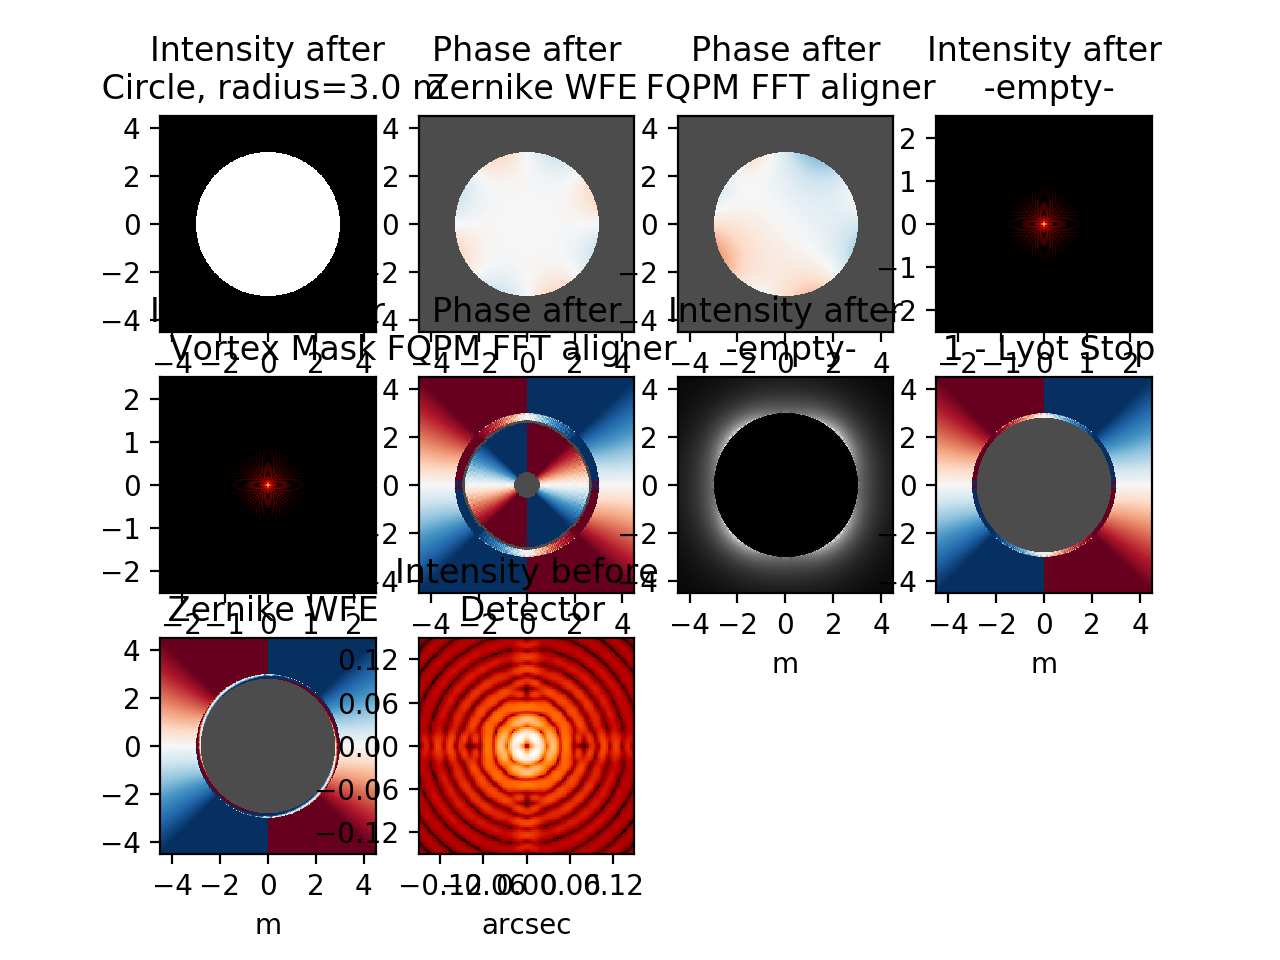

<IPython.core.display.Javascript object>


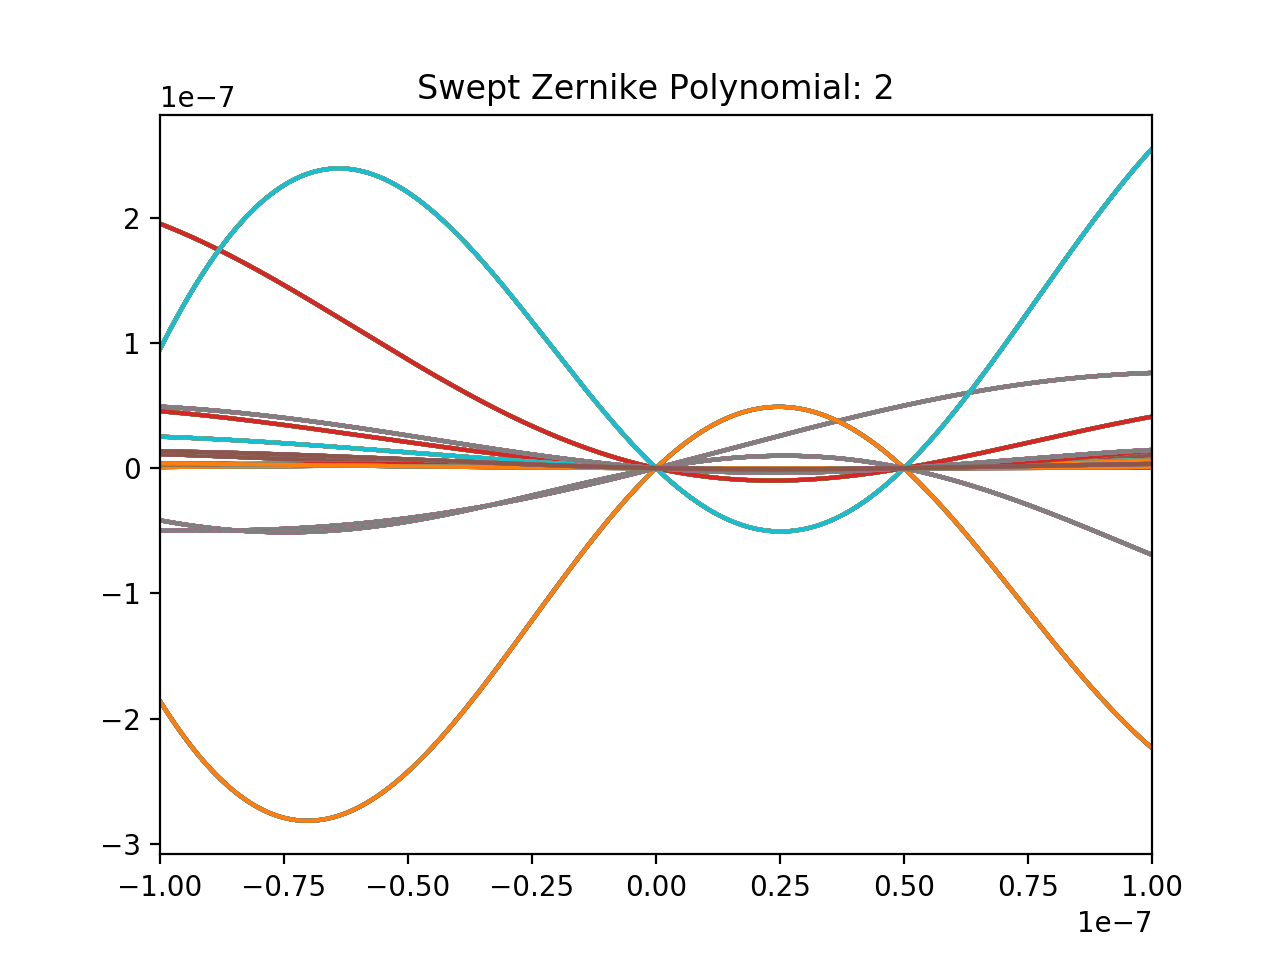

<IPython.core.display.Javascript object>


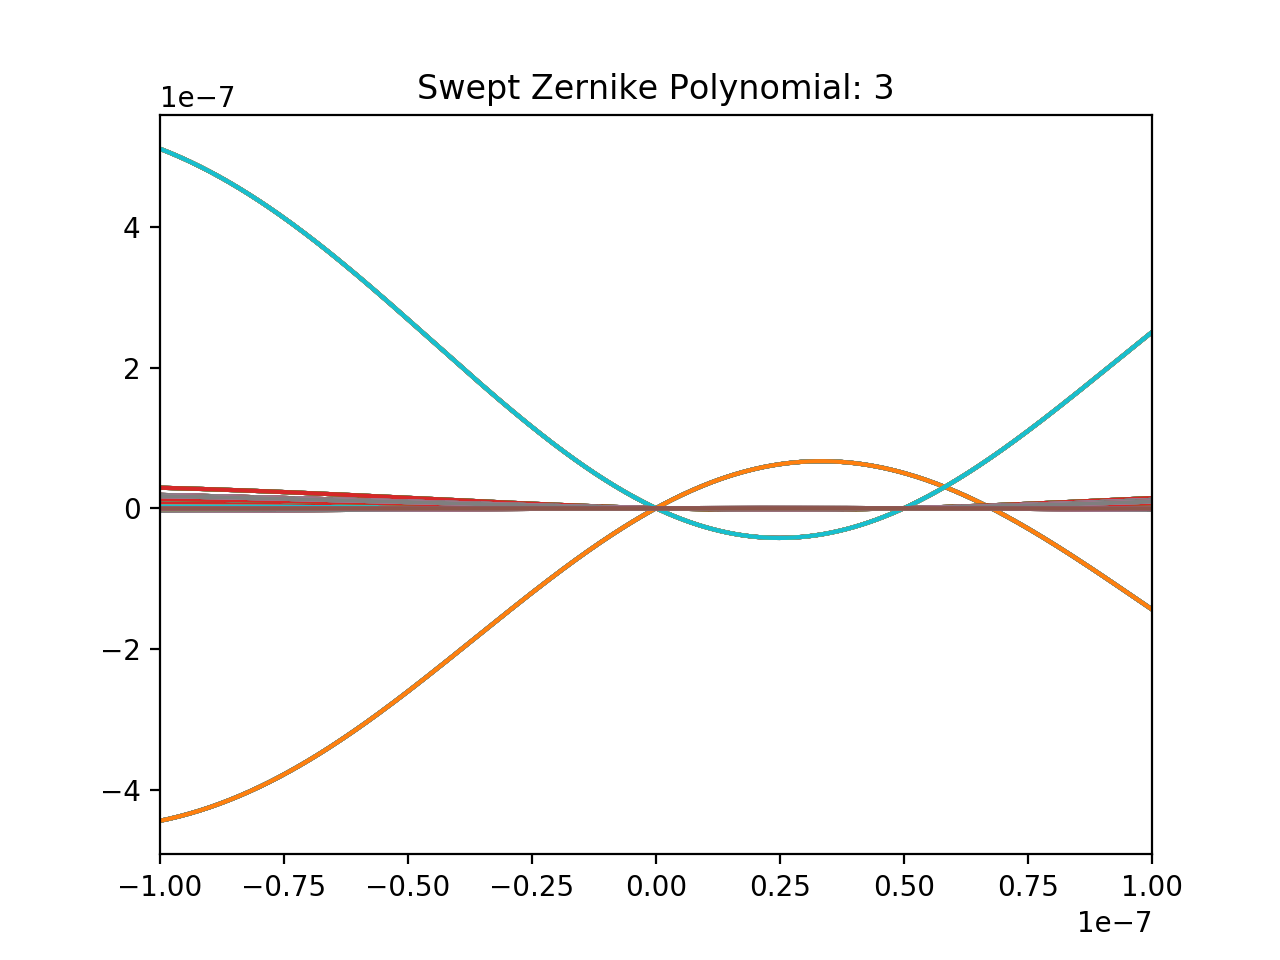

<IPython.core.display.Javascript object>


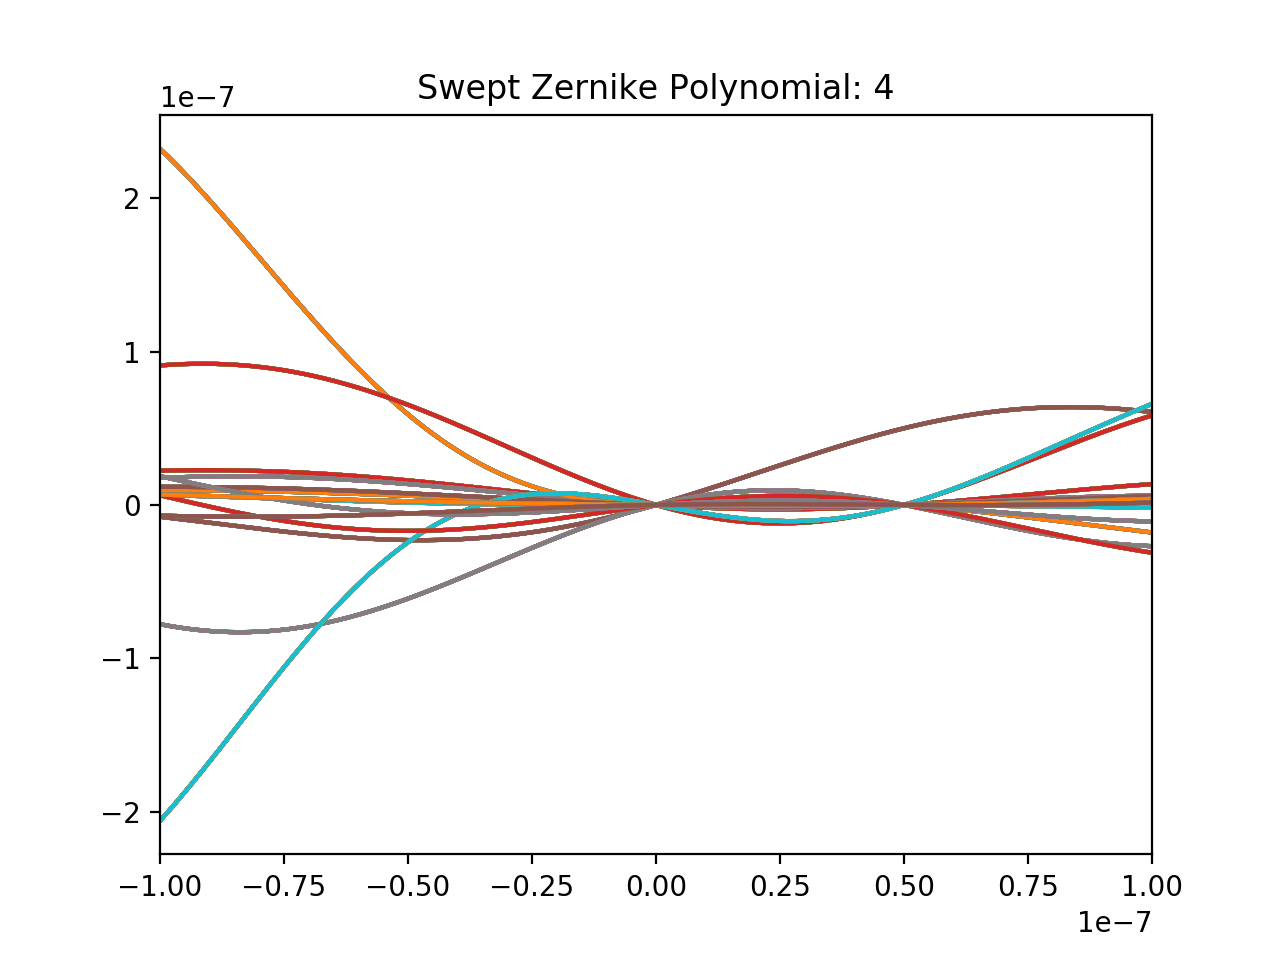

<IPython.core.display.Javascript object>


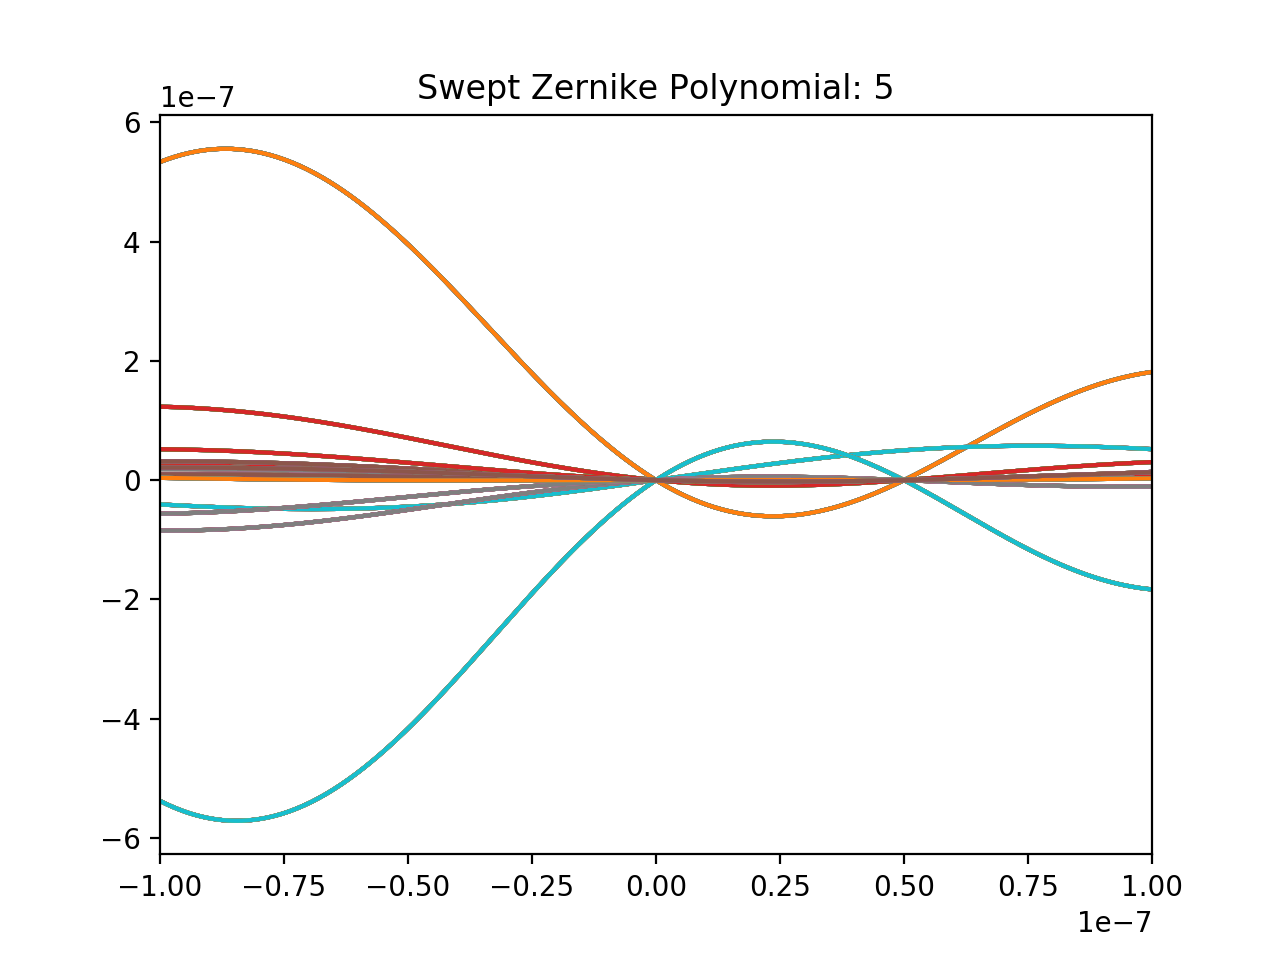

<IPython.core.display.Javascript object>


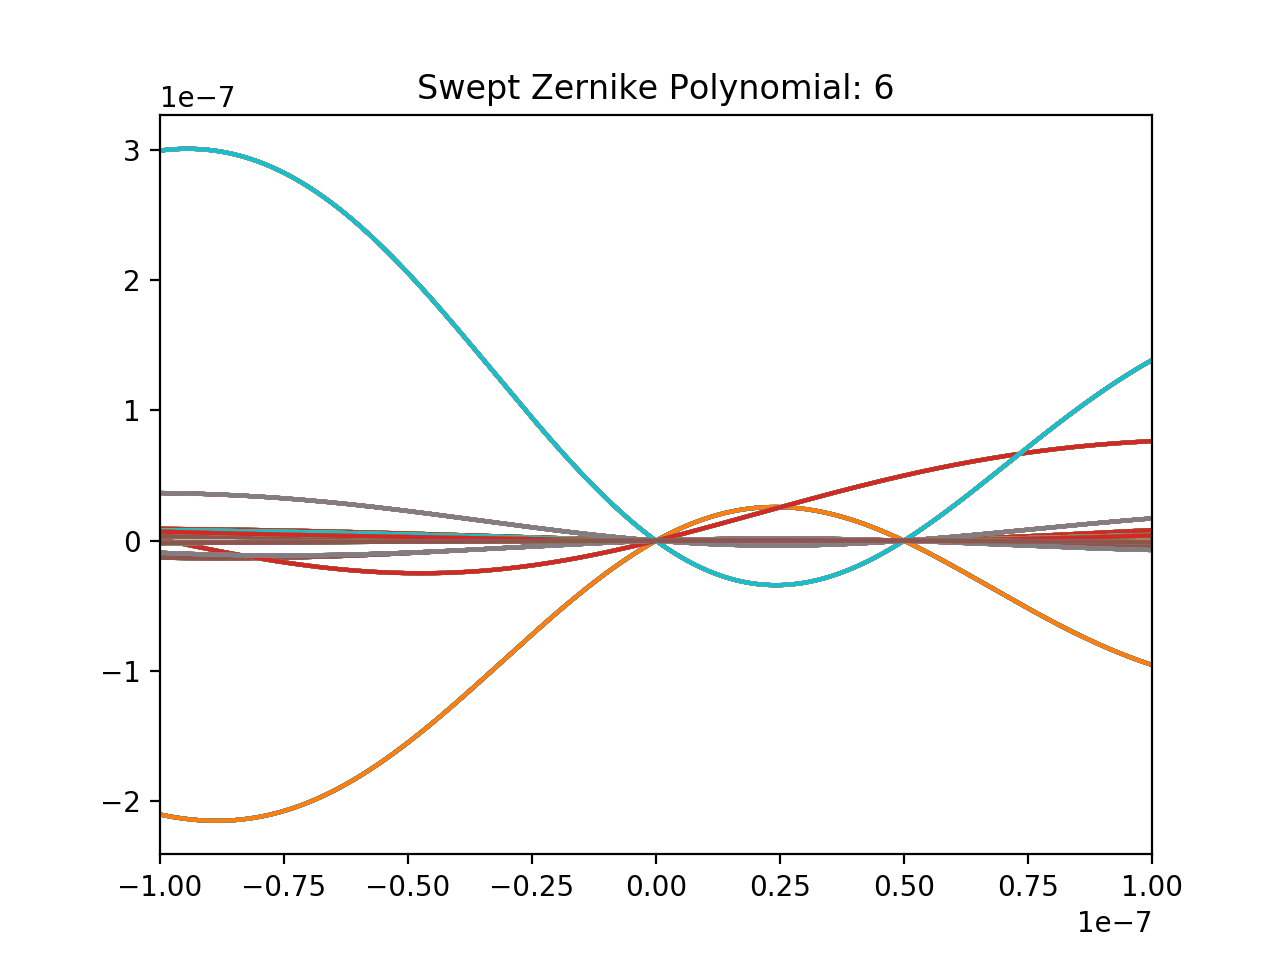

<IPython.core.display.Javascript object>


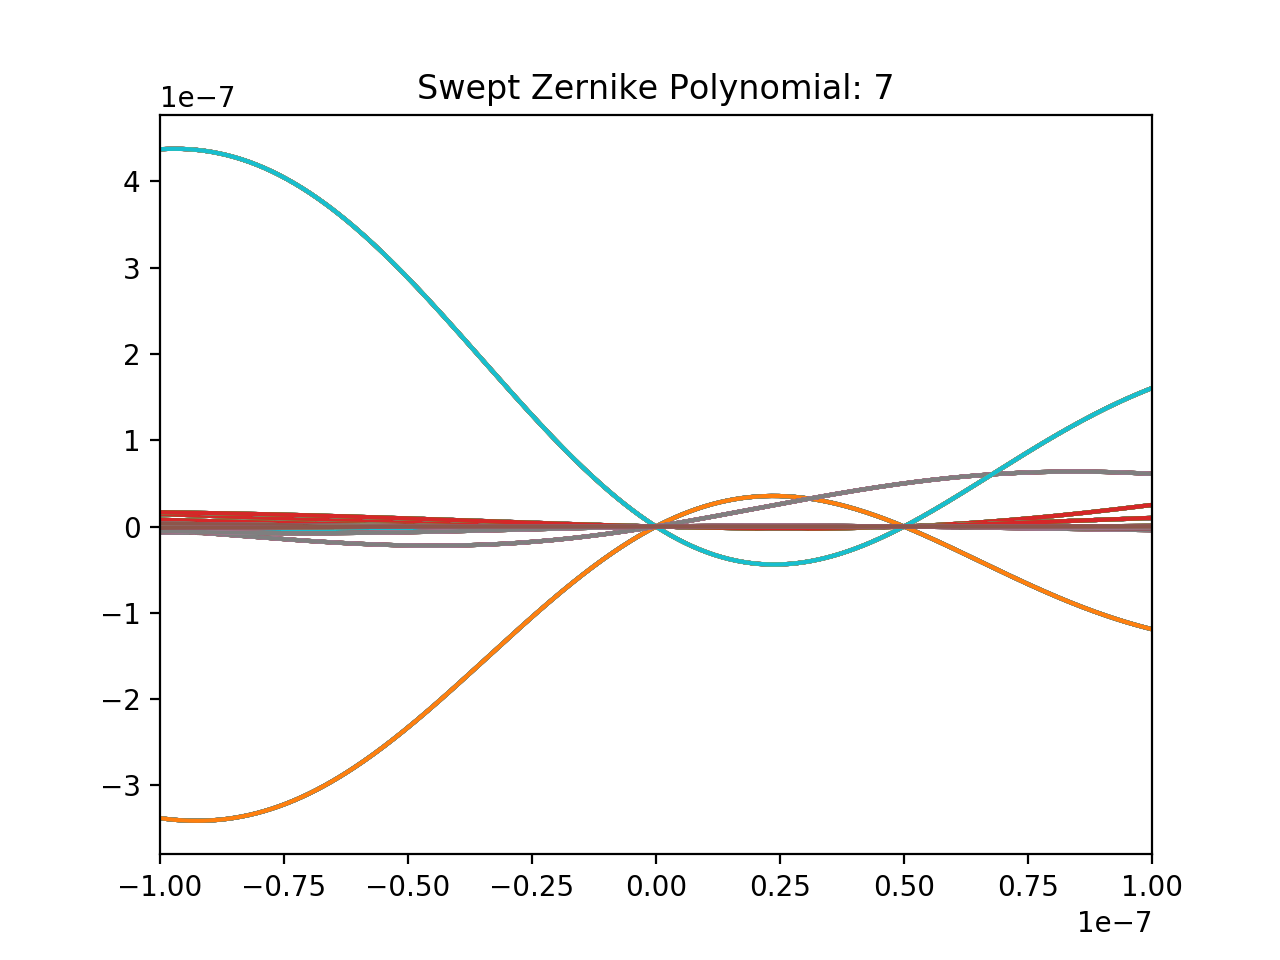

<IPython.core.display.Javascript object>


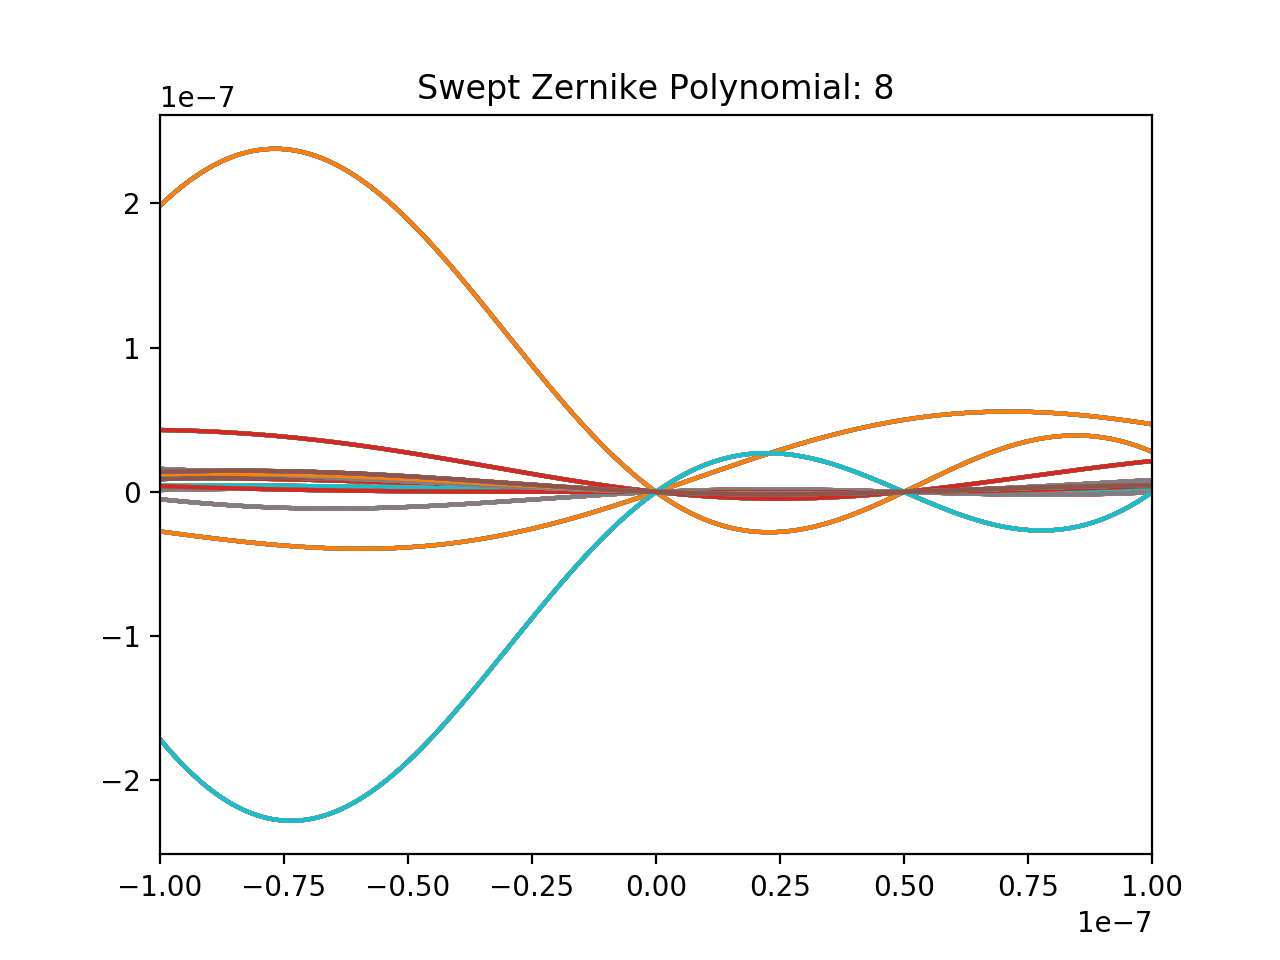

<IPython.core.display.Javascript object>


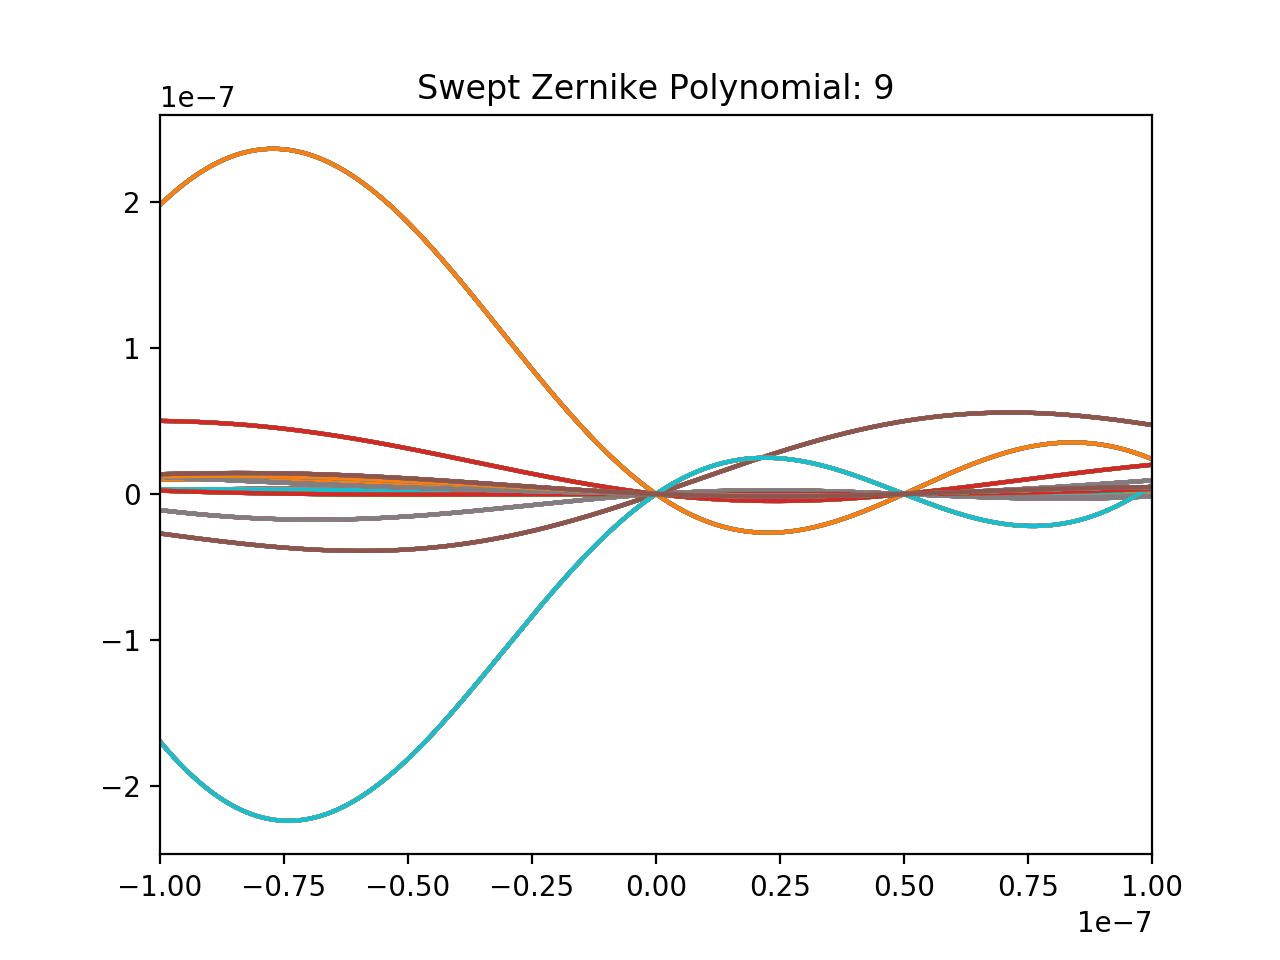

<IPython.core.display.Javascript object>


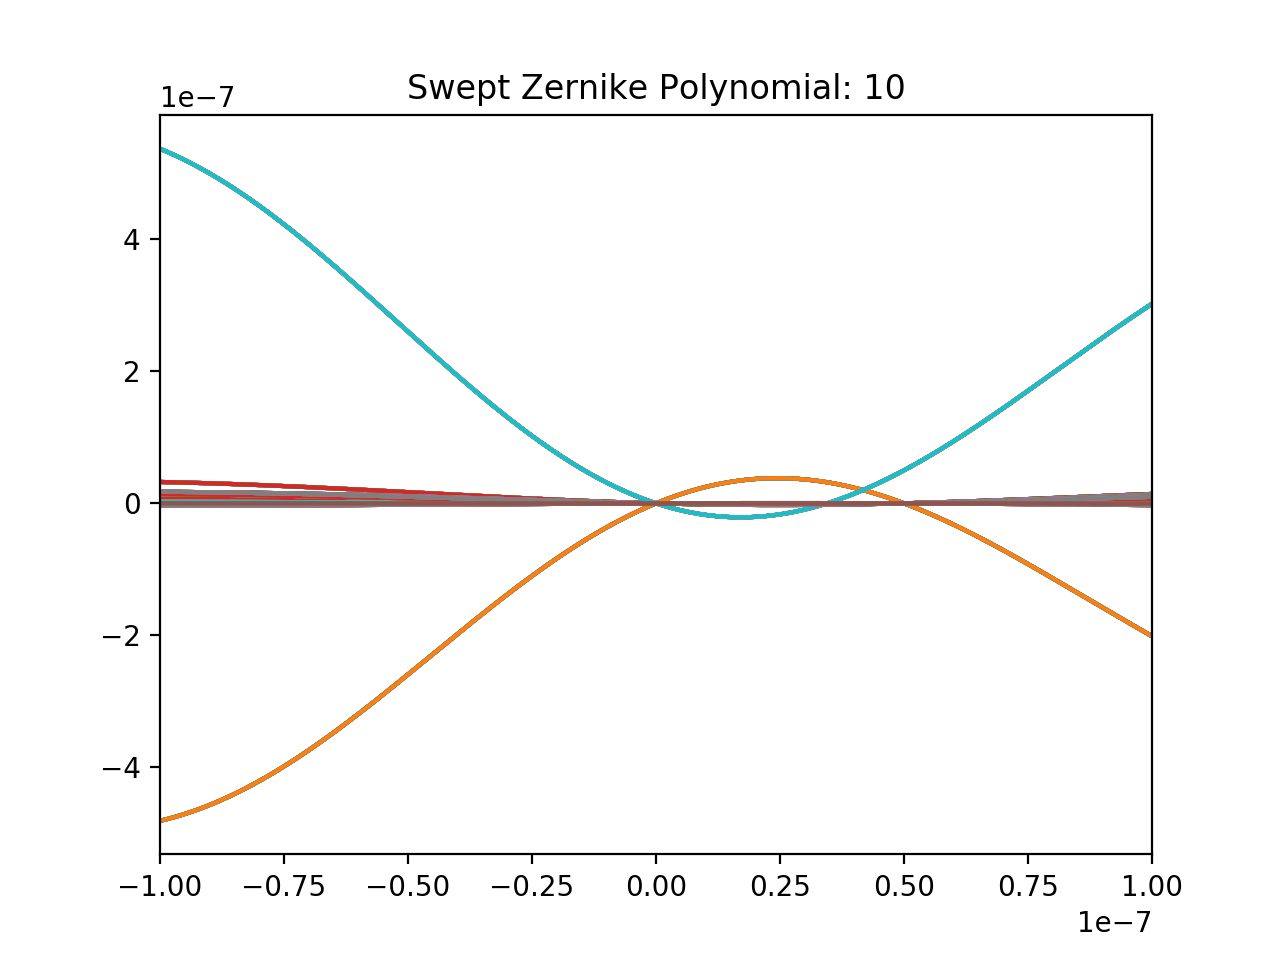

<IPython.core.display.Javascript object>


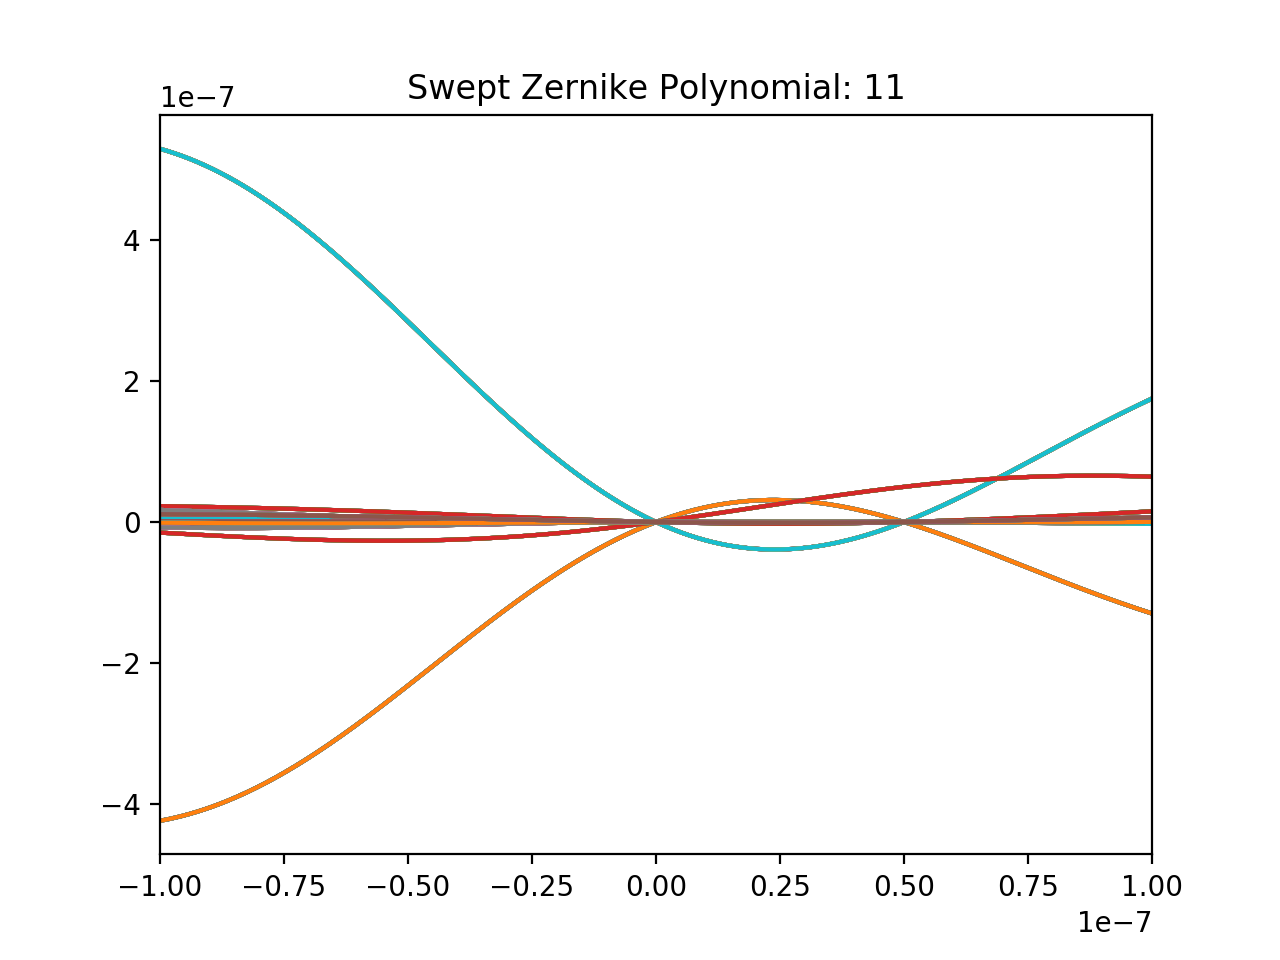

<IPython.core.display.Javascript object>


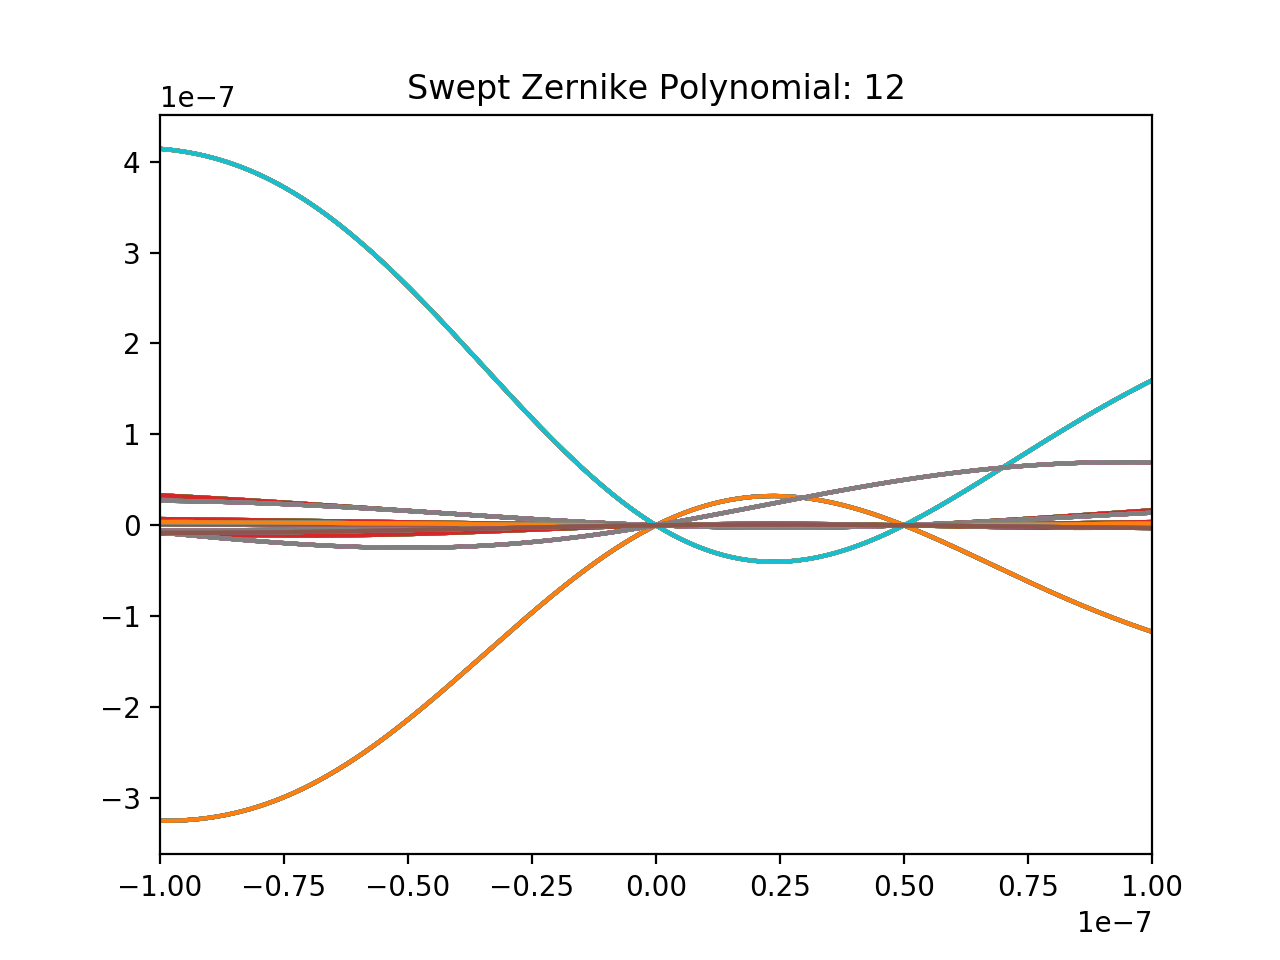

<IPython.core.display.Javascript object>


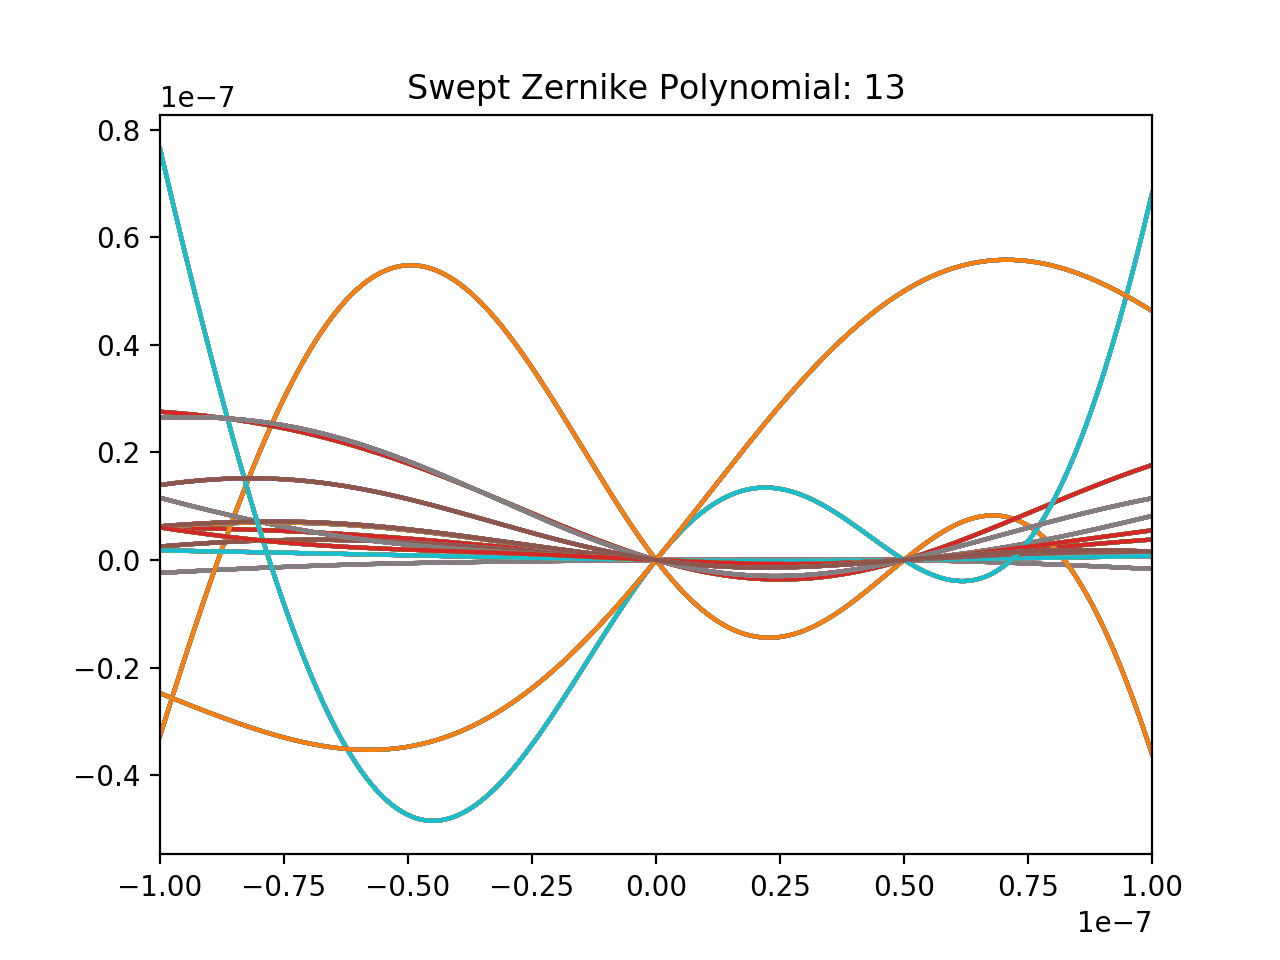

<IPython.core.display.Javascript object>


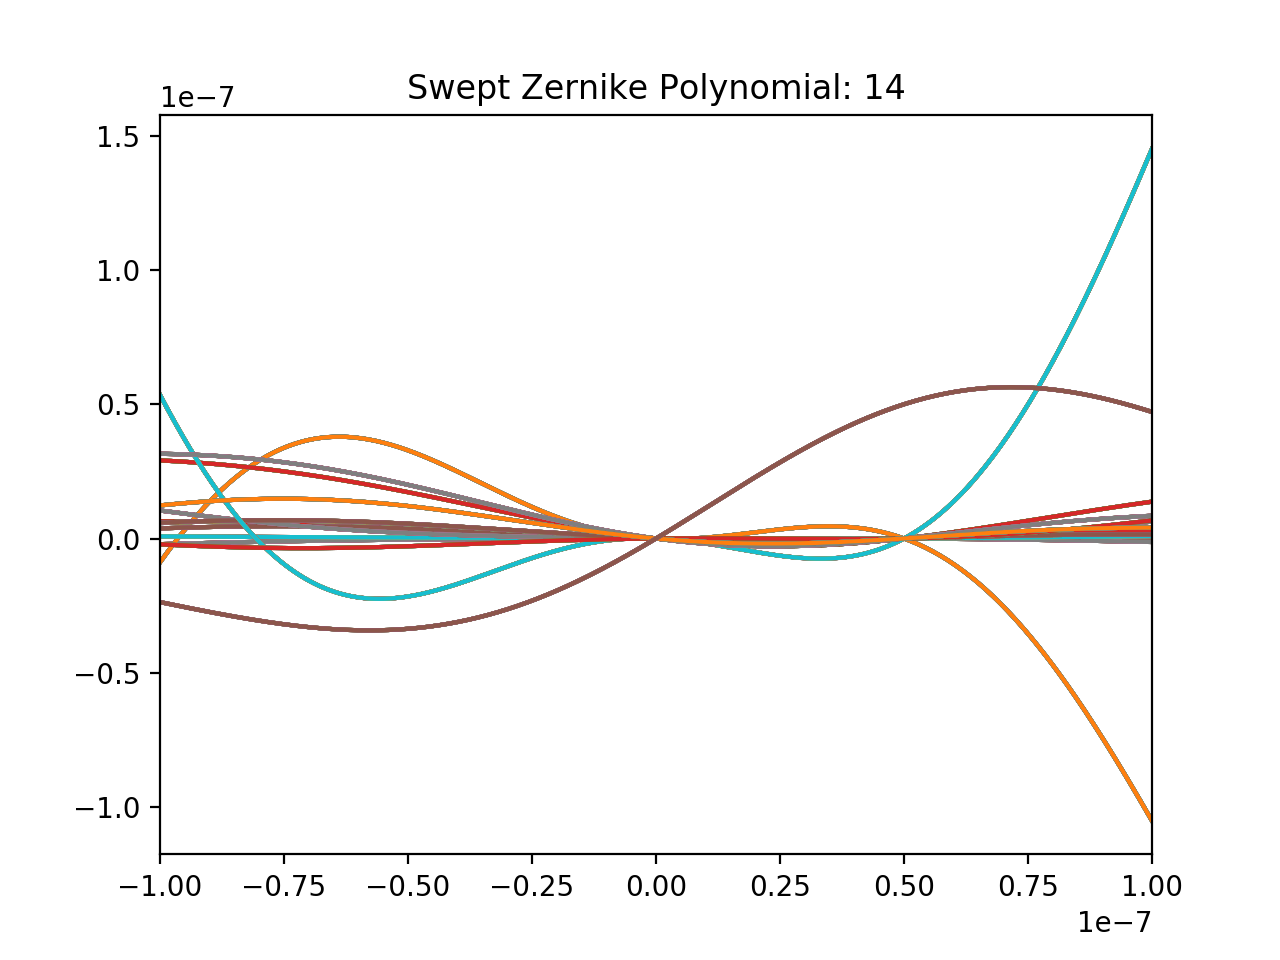

In [25]:
for i in range(M): #loop over coefficients
    plt.figure()
    #for j in range(K): #loop over examples
    truth[:,i] = coeffs_sep[i,:,i]
    for k in range(M): 
        resultsvec = rec_coeffs[k,:,i]*rms_phase_mode
        plt.plot(truth,resultsvec)
        plt.xlim([-100.0*1e-9,100.0*1e-9])
    plt.title('Swept Zernike Polynomial: '+str(i+1))
        #plt.ylim([-50,50])